### Experiment 1
# Boosting Algorithms vs Random Forest using Elliptic Dataset
<hr>

### Table of Contents

In [1]:
###### importing dependencies #############################################
import pprint
import matplotlib.pyplot as plt
from cryptoaml.utils import read_pickle
from IPython.core.display import display, HTML
from cryptoaml.metrics import results_table, plot_confusion_matrix, plot_time_indexed_results

###### constants ##########################################################
EXP_RESULT_PATH   = "persistence/experiment_1/results"
DEFAULT_RESULTS   = "{}/{}".format(EXP_RESULT_PATH, "defaults_models_results.pkl")
TUNED_RESULTS     = "{}/{}".format(EXP_RESULT_PATH, "tuned_models_results.pkl")

###### utilities ##########################################################
pp = pprint.PrettyPrinter(indent=4)

## Benchmark Model 

__Results obtained in the original paper [2]__

<table style="border-collapse:collapse;border-spacing:0;border-color:#ccc" class="tg"><tr><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:bold;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#333;background-color:#f0f0f0;text-align:center;vertical-align:top" rowspan="2"><br><br>Method<br></th><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:bold;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#333;background-color:#f0f0f0;text-align:center;vertical-align:top" colspan="3">Illicit</th><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:bold;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#333;background-color:#f0f0f0;text-align:center;vertical-align:top">MicroAVG</th></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#333;background-color:#fff;font-weight:bold;text-align:center;vertical-align:top">Precision</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#333;background-color:#fff;font-weight:bold;text-align:center;vertical-align:top">Recall</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#333;background-color:#fff;font-weight:bold;text-align:center;vertical-align:top">F1</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#333;background-color:#fff;font-weight:bold;text-align:center;vertical-align:top">F1</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;color:#000000;background-color:#fff;text-align:center;vertical-align:top">LogReg <span style="font-style:italic">(AF)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.404</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.593</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.481</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.931</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;color:#000000;background-color:#fff;text-align:center;vertical-align:top">LogReg <span style="font-style:italic">(AF+NE)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.537</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.528</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.533</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.945</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">LogReg <span style="font-style:italic">(LF)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.348</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.668</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.457</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.920</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">LogReg <span style="font-style:italic">(LF+NE)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.518</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.571</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.543</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.945</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#34ff34;text-align:center;vertical-align:top">RF <span style="font-style:italic">(AF)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.956</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.670</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.788</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.977</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#34ff34;text-align:center;vertical-align:top">RF <span style="font-style:italic">(AF+NE)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#34ff34;text-align:center;vertical-align:top">0.971</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#000000;background-color:#34ff34;text-align:center;vertical-align:top">0.675</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#34ff34;text-align:center;vertical-align:top">0.796</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.978</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#34ff34;text-align:center;vertical-align:top">RF <span style="font-style:italic">(LF)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.803</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.611</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.694</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.966</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#34ff34;text-align:center;vertical-align:top">RF <span style="font-style:italic">(LF+NE)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.874</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.668</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.759</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.973</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">MLP (<span style="font-style:italic">AF</span>)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.694</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.617</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.653</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.962</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">MLP <span style="font-style:italic">(AF+NE)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.780</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.617</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.689</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.967</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">MLP <span style="font-style:italic">(LF)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.637</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.662</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.649</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.958</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">MLP <span style="font-style:italic">(LF+NE)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.6819</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.5782</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.6258</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#34ff34;text-align:center;vertical-align:top">0.986</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">GCN</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.812</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.512</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.628</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.961</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">Skip-GCN</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.812</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.623</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.705</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.966</td></tr></table>


## Default Parameters - Boosting Models
- [XGBoost: eXtreme Gradient Boosting](https://xgboost.readthedocs.io/en/latest/) 
- [LightGBM: Light Gradient Boosting Machine](https://lightgbm.readthedocs.io/en/latest/) 
- [CatBoost](https://catboost.ai/) 

In [13]:
# load results for default models
default_results = read_pickle(DEFAULT_RESULTS)

### Evaluation Metrics (Defaults)
- <i>Precision</i> 
- <i>Recall</i> 
- <i>F1</i>
- <i>F1 Micro Avg/Accuracy<i/>
- AUC
    
<small>
    <i>
    Italics text refers to metrics which were used in the benchmark paper.
    </i>
</small>

In [3]:
# dataframe with all the perfomance metrics
print("Performance metrics for defaults boosting models")
defaults_metrics_df = results_table(default_results)
display(defaults_metrics_df)

# sorted by f1 score
print("Performance metrics for defaults boosting models sorted by f1-score")
display(defaults_metrics_df.sort_values("f1", ascending=False))

Performance metrics for defaults boosting models


,model,precision,recall,f1_micro,accuracy,auc,f1
0,xg_boost_LF,0.877,0.702,0.974,0.974,0.847,0.779
1,xg_boost_LF_NE,0.988,0.665,0.978,0.978,0.832,0.795
2,xg_boost_AF,0.902,0.723,0.977,0.977,0.859,0.803
3,xg_boost_AF_NE,0.979,0.693,0.979,0.979,0.846,0.812
4,light_boost_LF,0.861,0.711,0.974,0.974,0.852,0.779
5,light_boost_LF_NE,0.977,0.681,0.978,0.978,0.840,0.803
6,light_boost_AF,0.931,0.723,0.979,0.979,0.860,0.814
7,light_boost_AF_NE,0.983,0.689,0.979,0.979,0.844,0.810
8,cat_boost_LF,0.902,0.702,0.976,0.976,0.848,0.789
9,cat_boost_LF_NE,0.975,0.675,0.978,0.978,0.837,0.798


Performance metrics for defaults boosting models sorted by f1-score


,model,precision,recall,f1_micro,accuracy,auc,f1
10,cat_boost_AF,0.953,0.717,0.979,0.979,0.858,0.819
6,light_boost_AF,0.931,0.723,0.979,0.979,0.860,0.814
11,cat_boost_AF_NE,0.984,0.693,0.979,0.979,0.846,0.813
3,xg_boost_AF_NE,0.979,0.693,0.979,0.979,0.846,0.812
7,light_boost_AF_NE,0.983,0.689,0.979,0.979,0.844,0.810
2,xg_boost_AF,0.902,0.723,0.977,0.977,0.859,0.803
5,light_boost_LF_NE,0.977,0.681,0.978,0.978,0.840,0.803
9,cat_boost_LF_NE,0.975,0.675,0.978,0.978,0.837,0.798
1,xg_boost_LF_NE,0.988,0.665,0.978,0.978,0.832,0.795
8,cat_boost_LF,0.902,0.702,0.976,0.976,0.848,0.789


### Confusion Matrices (Defaults)

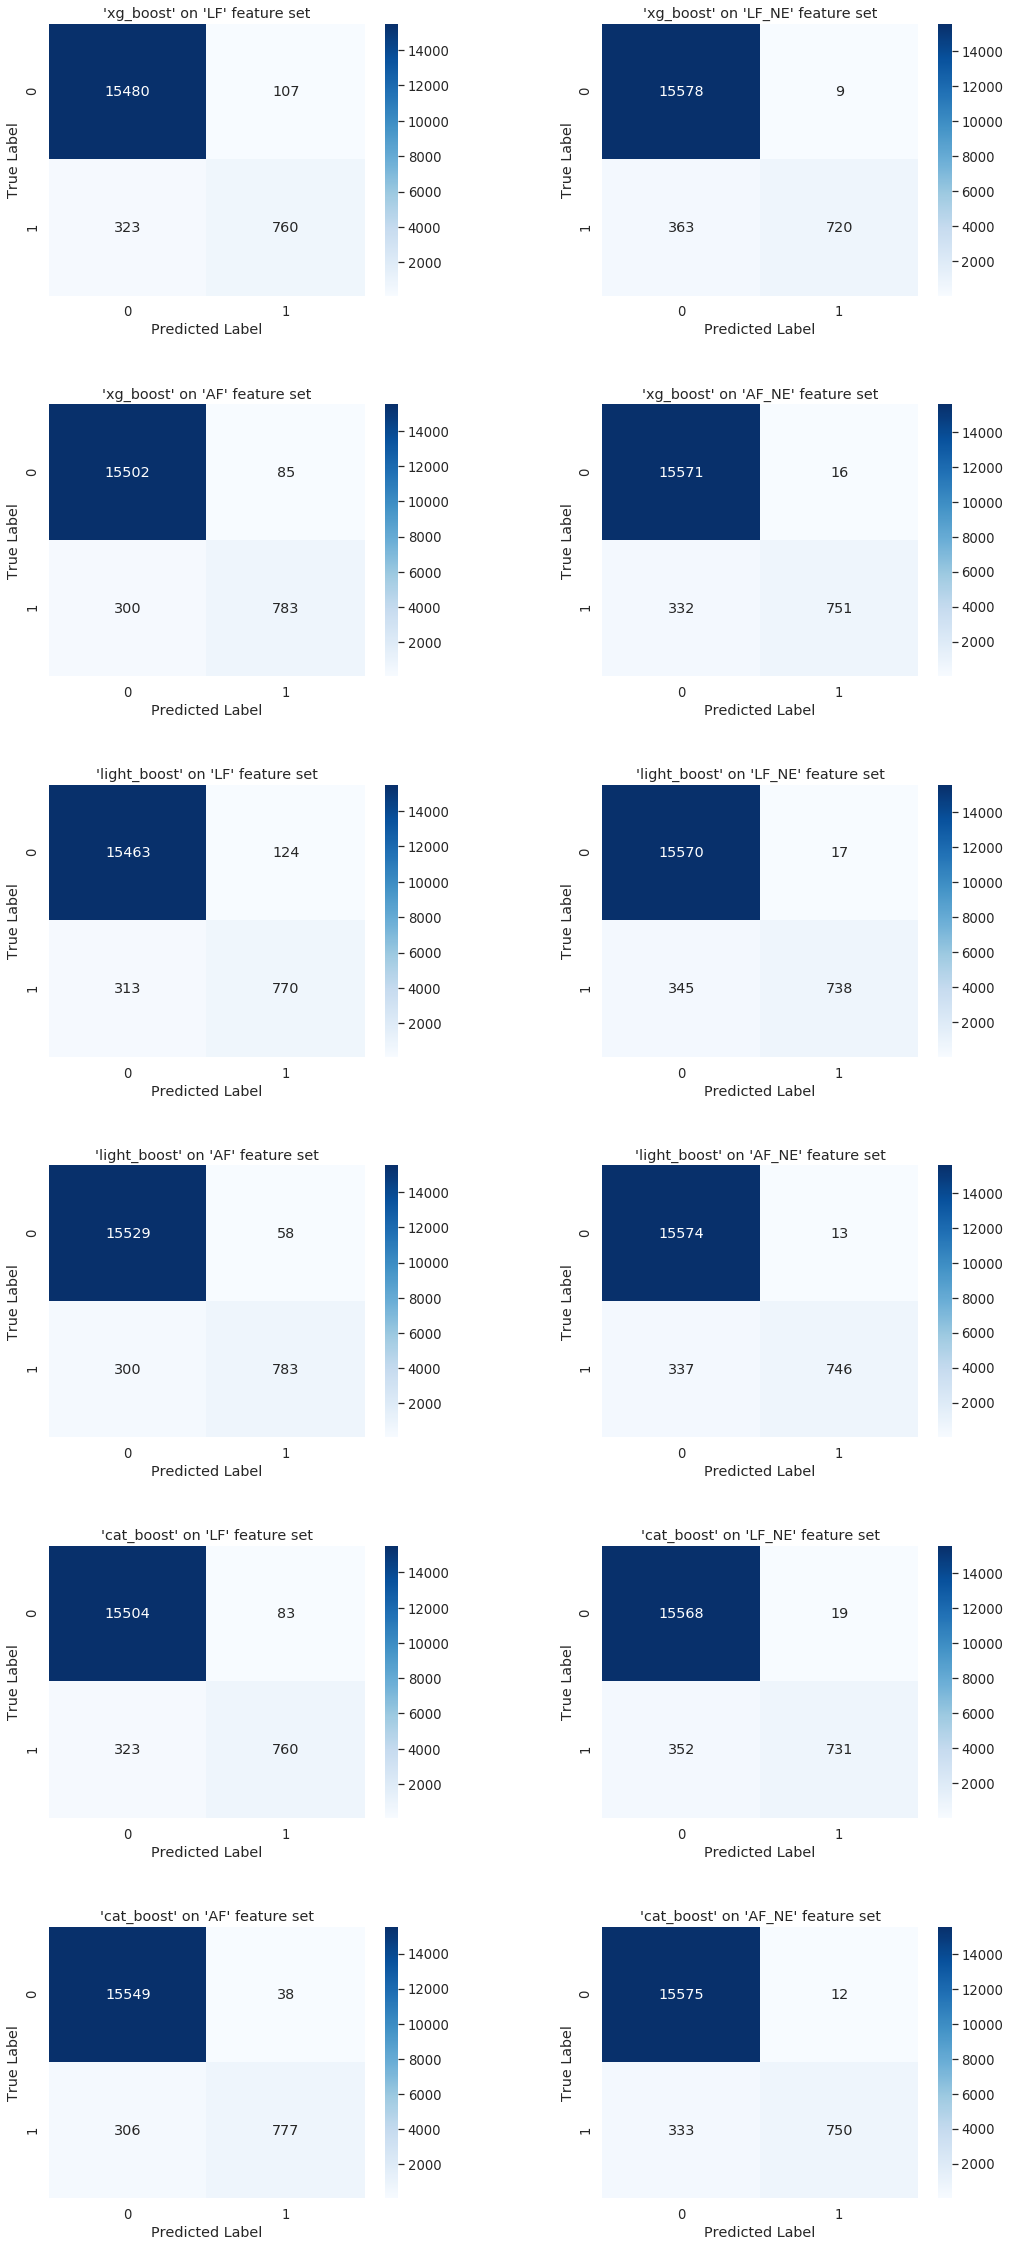

In [10]:
# loop and extract confusion matrices 
confusion_matrices = []
for model_key, model_value in default_results.items():
    for feature_set, feature_set_value in model_value.items():
        plot_title = "'{}' on '{}' feature set".format(model_key,feature_set)
        confusion_matrix = feature_set_value["metrics"]["confusion"]
        confusion_matrices.append((plot_title, confusion_matrix))

# display plots 
plot_confusion_matrix(matrices=confusion_matrices, figsize=(17,40))

### F1 Results over Test Time Span (Defaults)

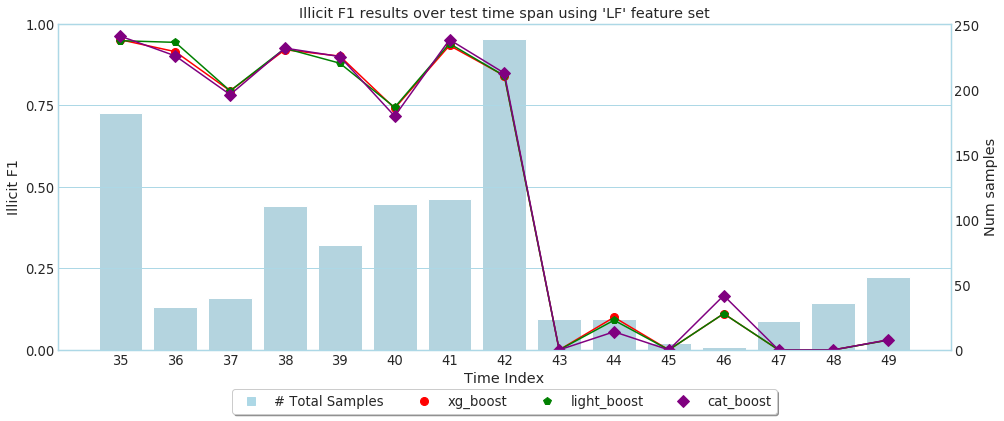

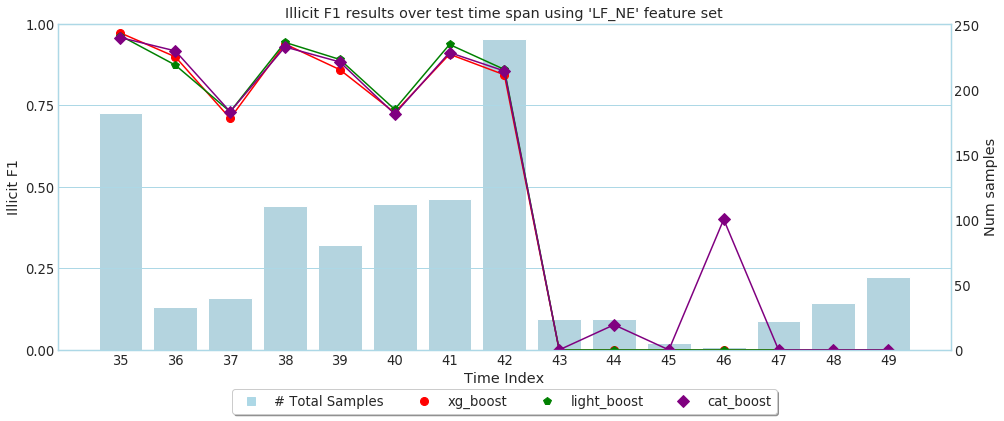

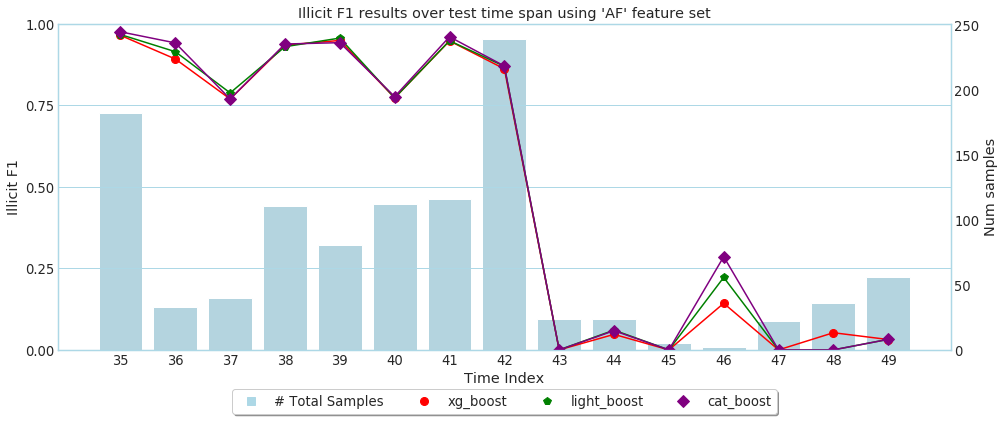

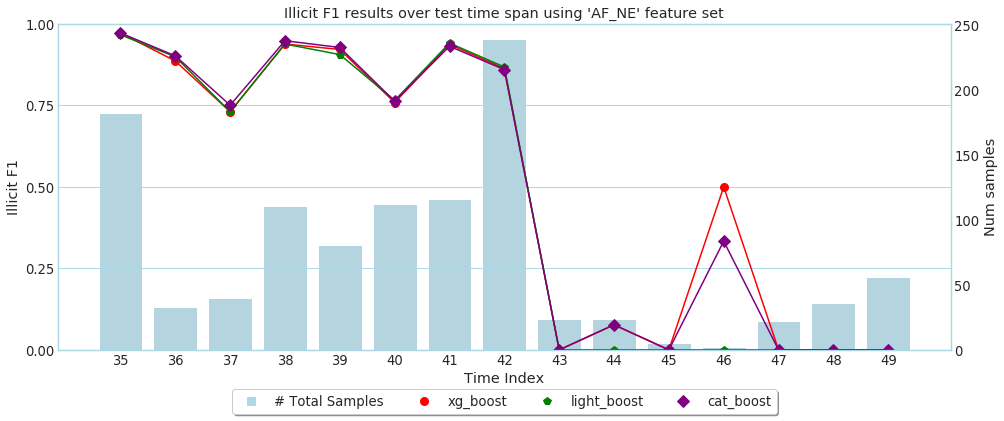

In [11]:
# loop and extract time indexed f1 score for each feature set 
defaults_results_time_results = {}
for model_key, model_value in default_results.items():
    for feature_set, feature_set_value in model_value.items(): 
        tmp_time_metrics = feature_set_value["time_metrics"]
        if feature_set not in defaults_results_time_results:
            defaults_results_time_results[feature_set] = {}
            defaults_results_time_results[feature_set]["scores"] = []
            defaults_results_time_results[feature_set]["timestep"] = tmp_time_metrics["timestep"]
            defaults_results_time_results[feature_set]["total_pos_label"] = tmp_time_metrics["total_pos_label"]
        defaults_results_time_results[feature_set]["scores"].append((model_key, tmp_time_metrics["score"]))

# plot results over test time span 
for feat_key, time_results in defaults_results_time_results.items():
    plot_title = "Illicit F1 results over test time span using '{}' feature set".format(feat_key)
    plot_time_indexed_results(time_steps=time_results["timestep"],
                              indexed_total_samples=time_results["total_pos_label"],
                              indexed_scores=time_results["scores"],
                              metric_title="Illicit F1",
                              plot_title=plot_title)

### Feature Importance (Defaults)

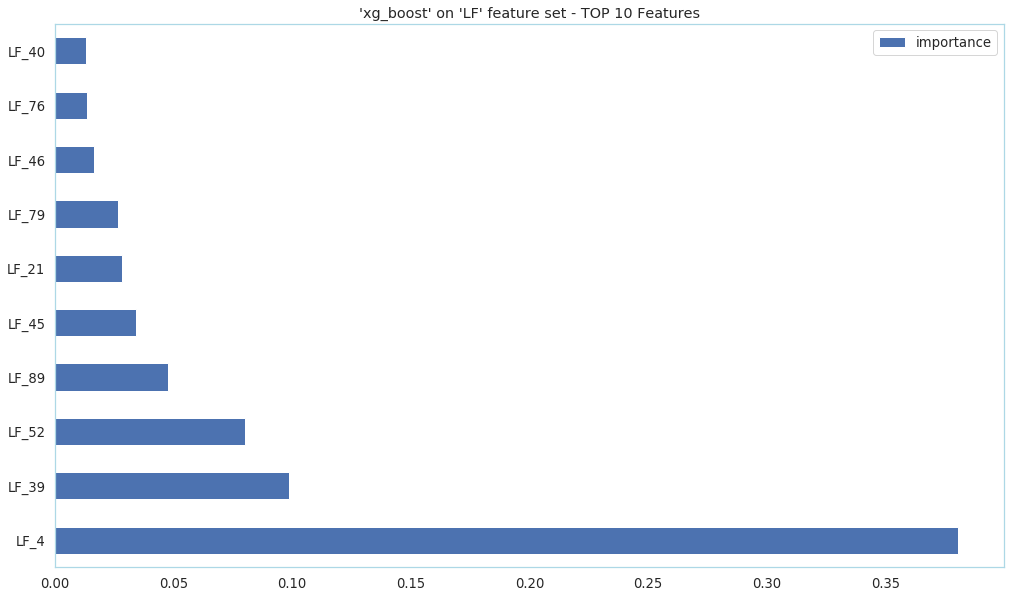

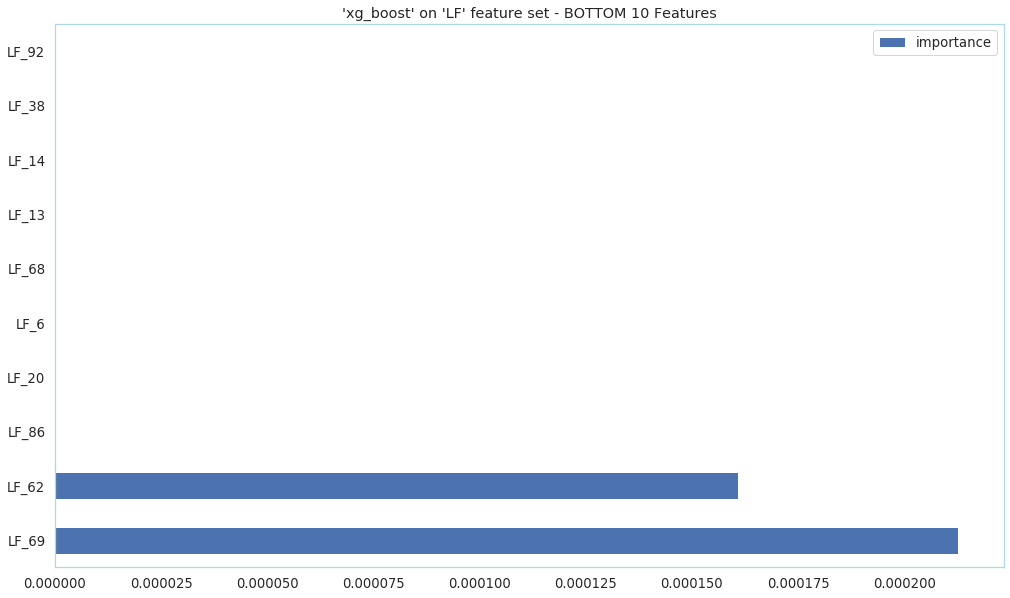

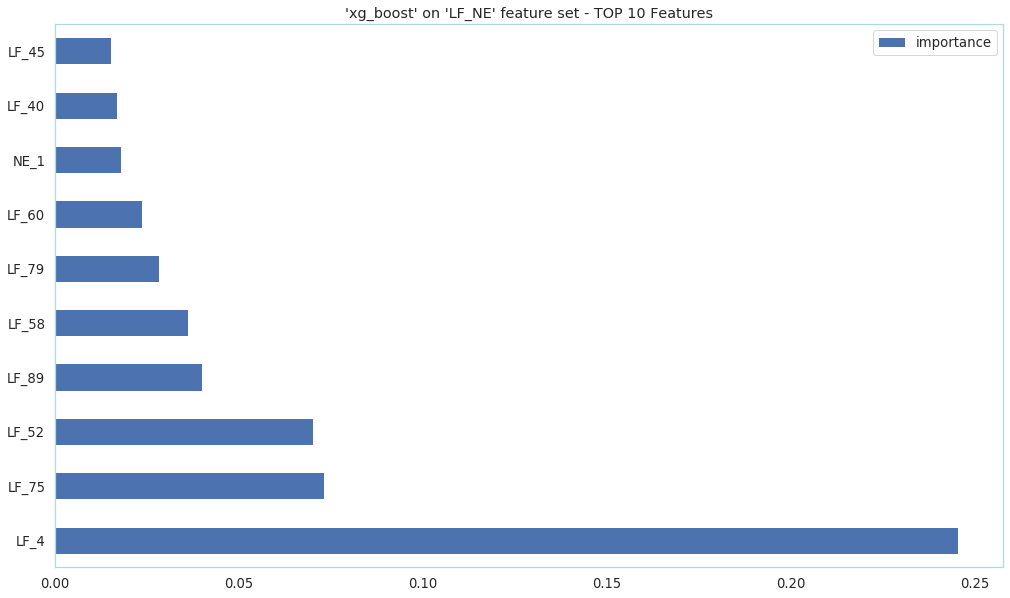

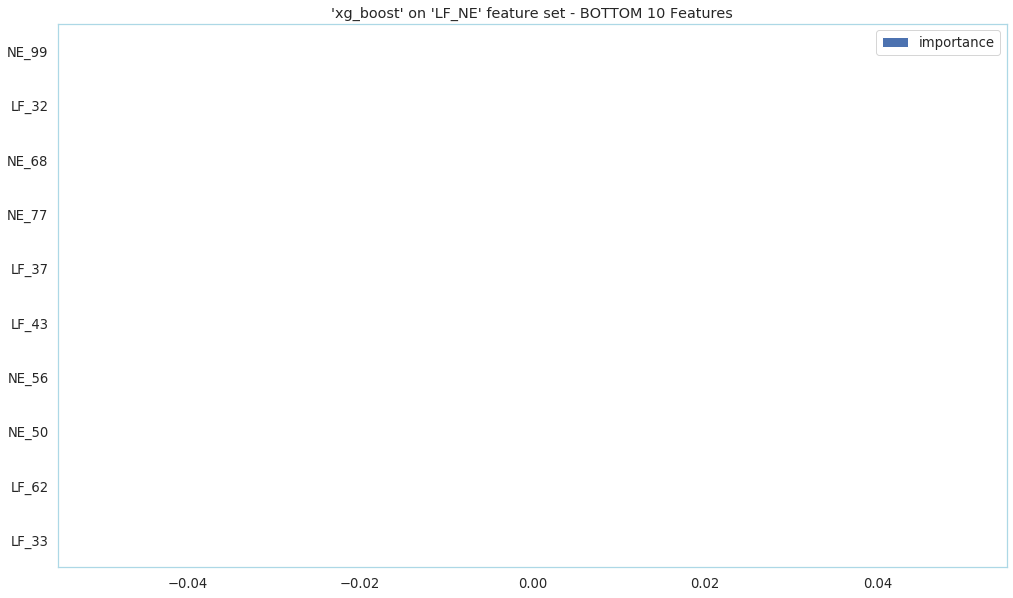

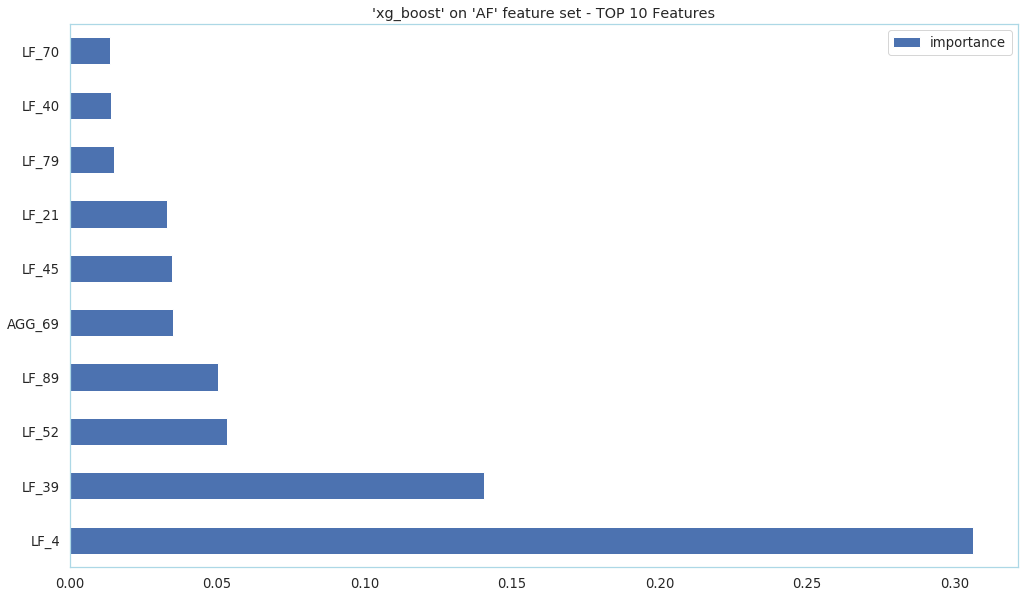

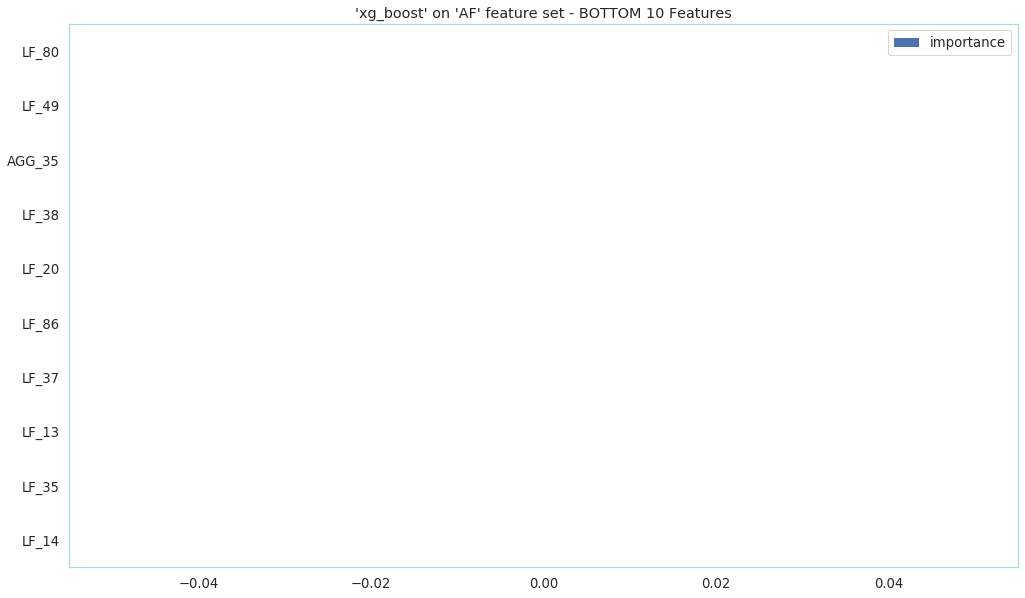

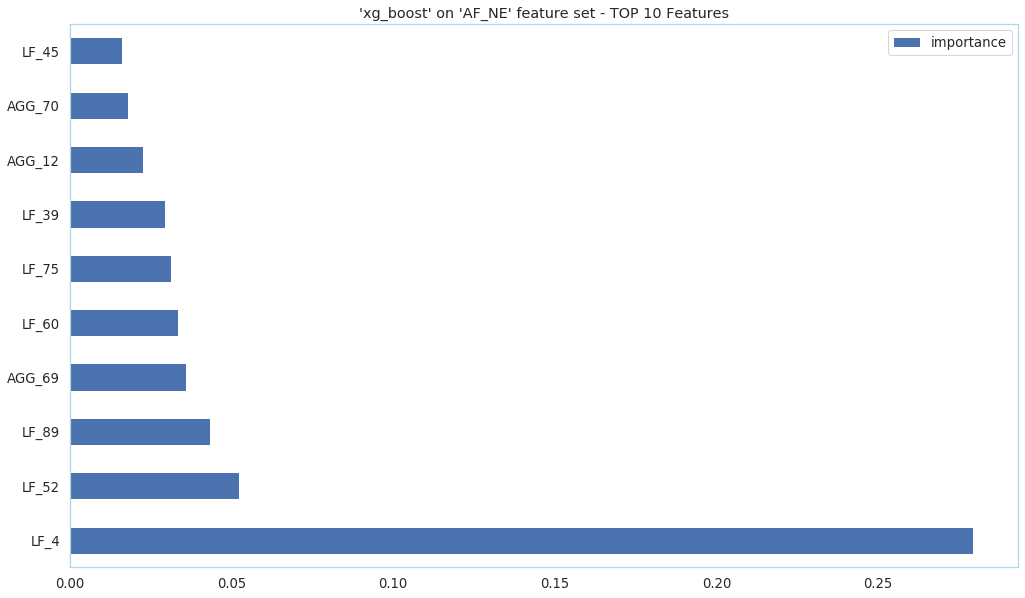

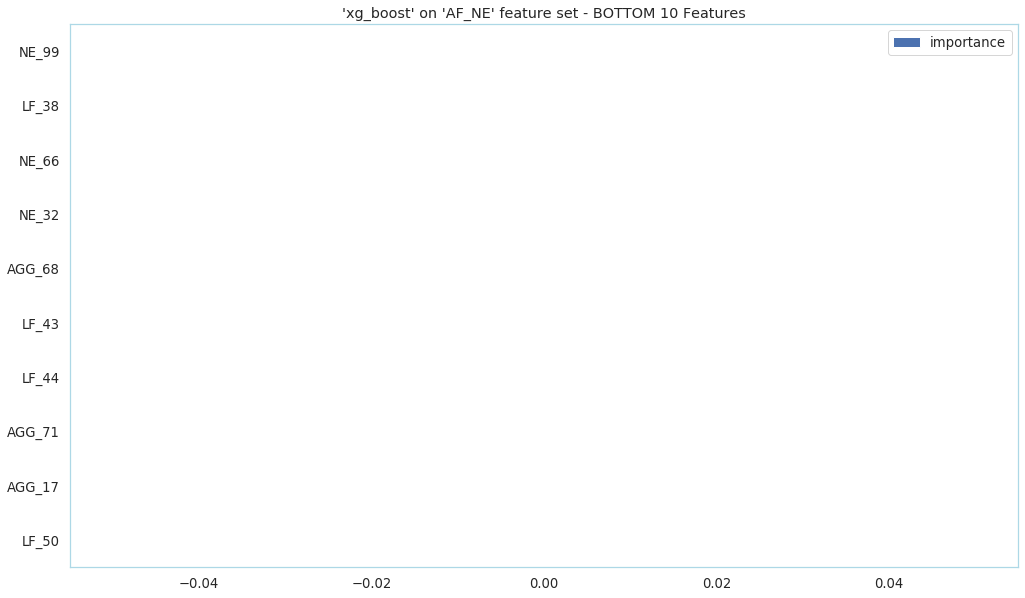

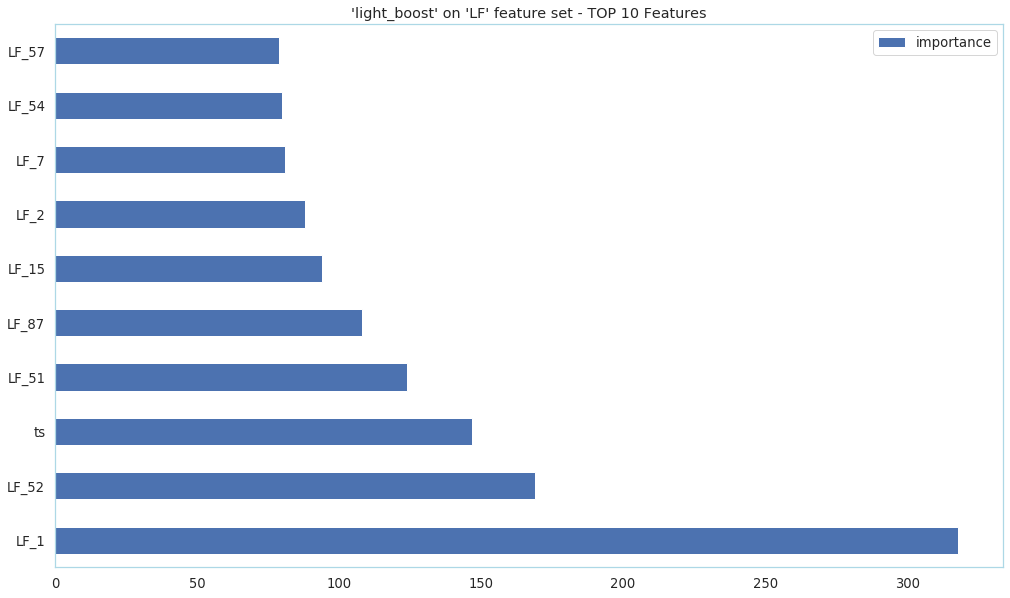

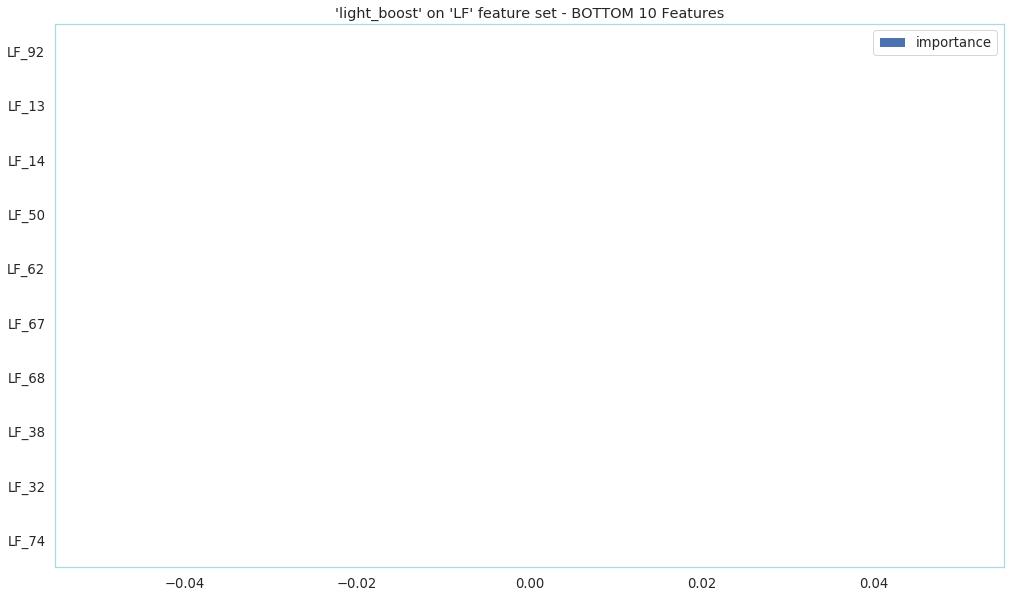

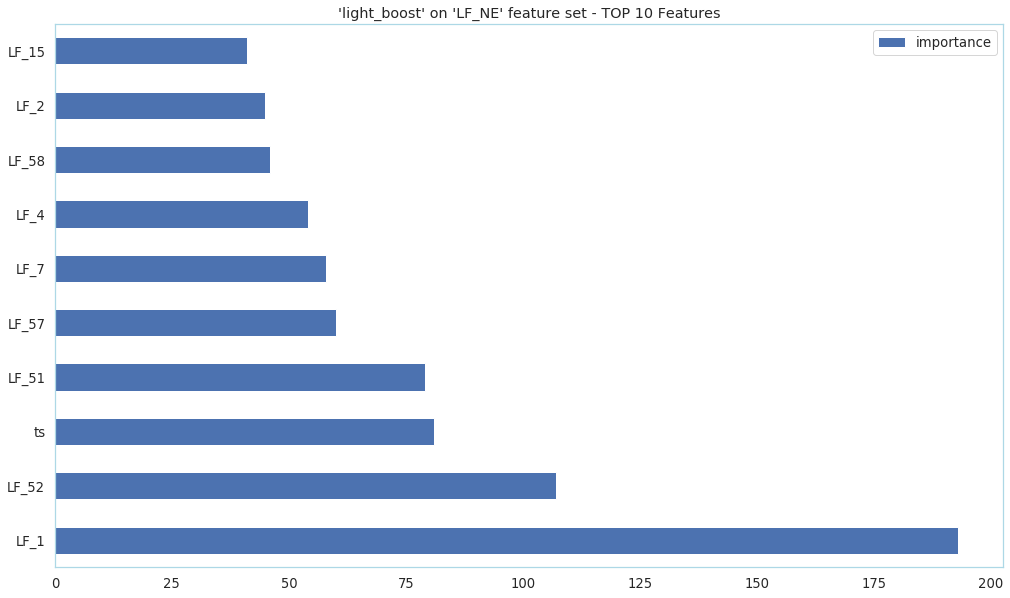

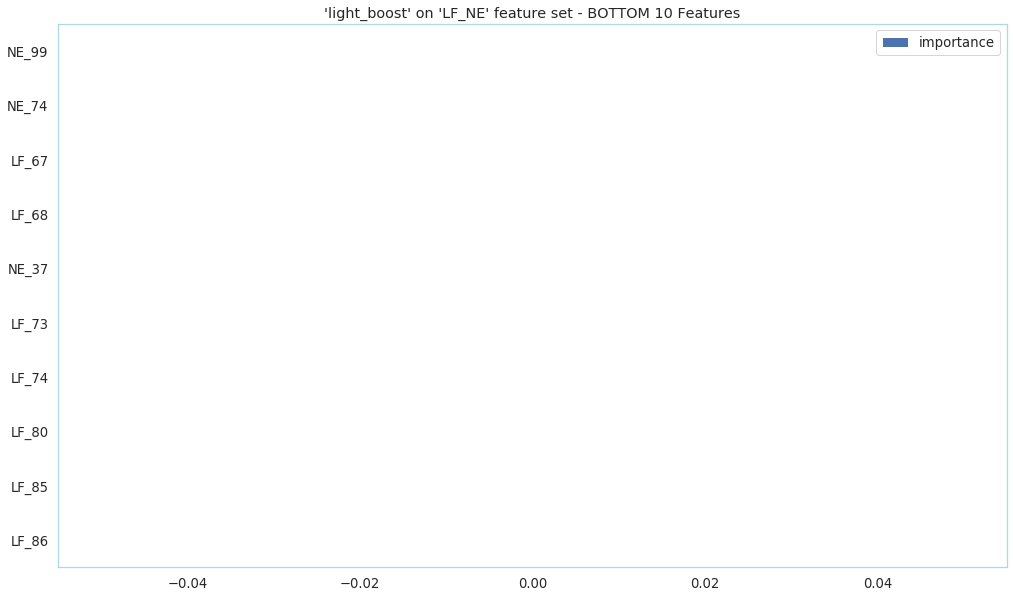

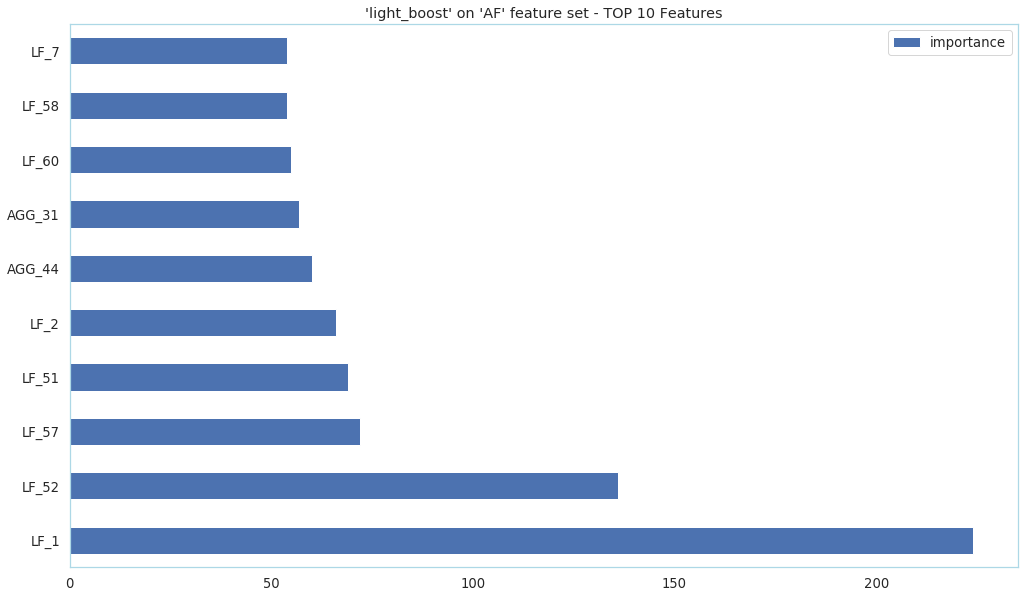

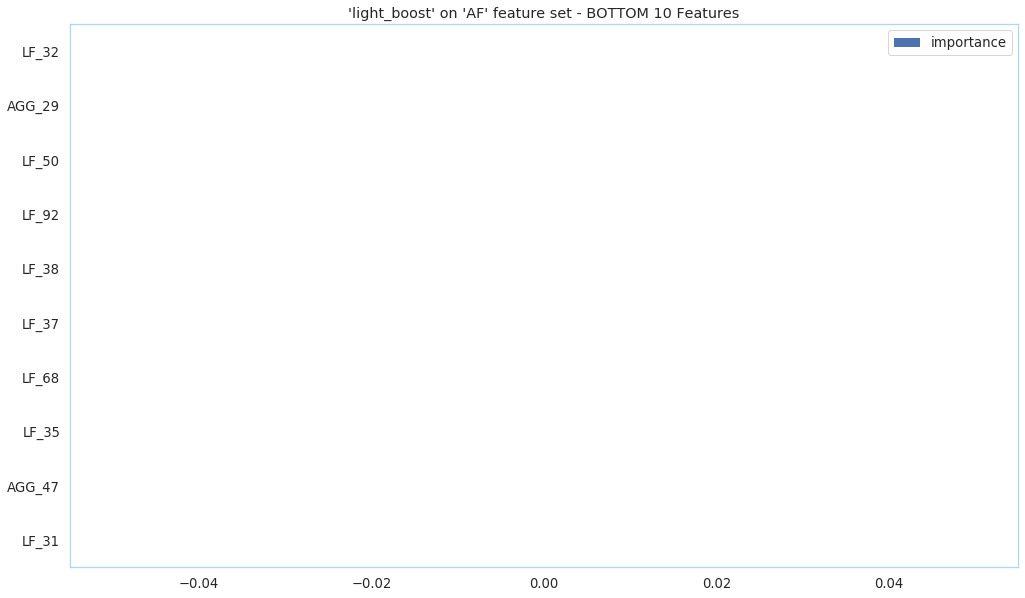

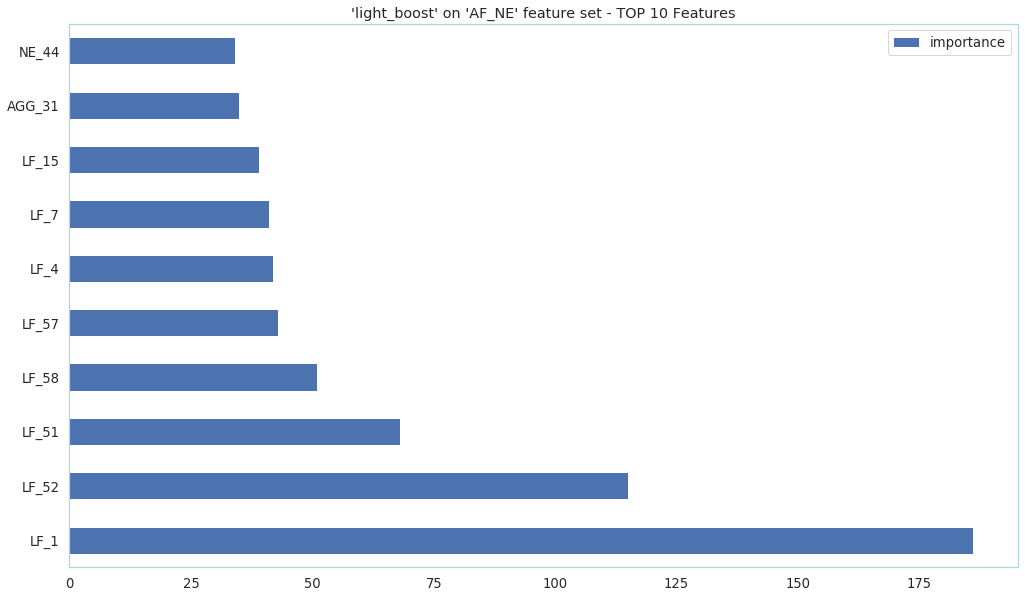

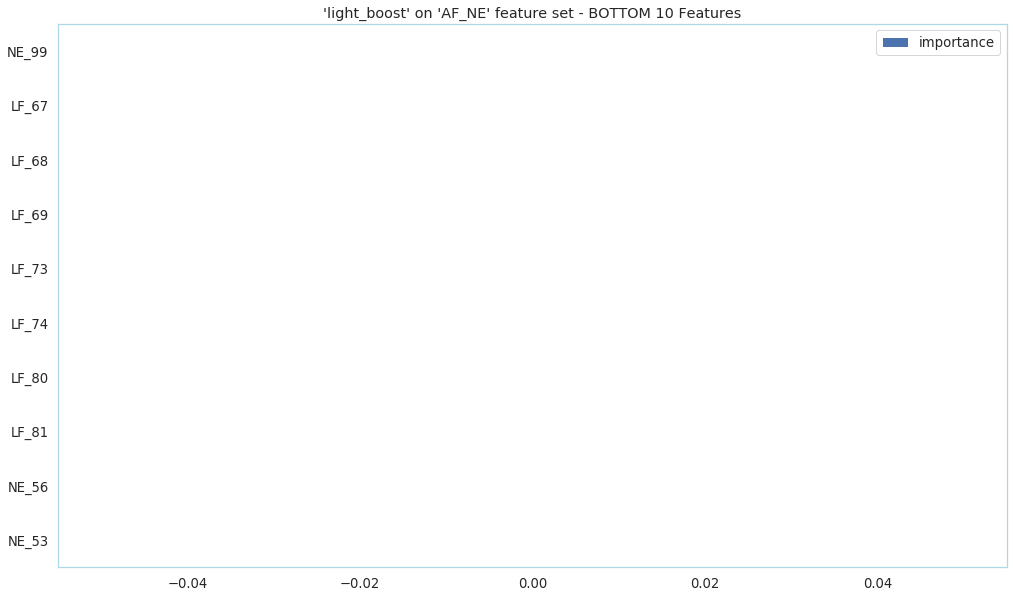

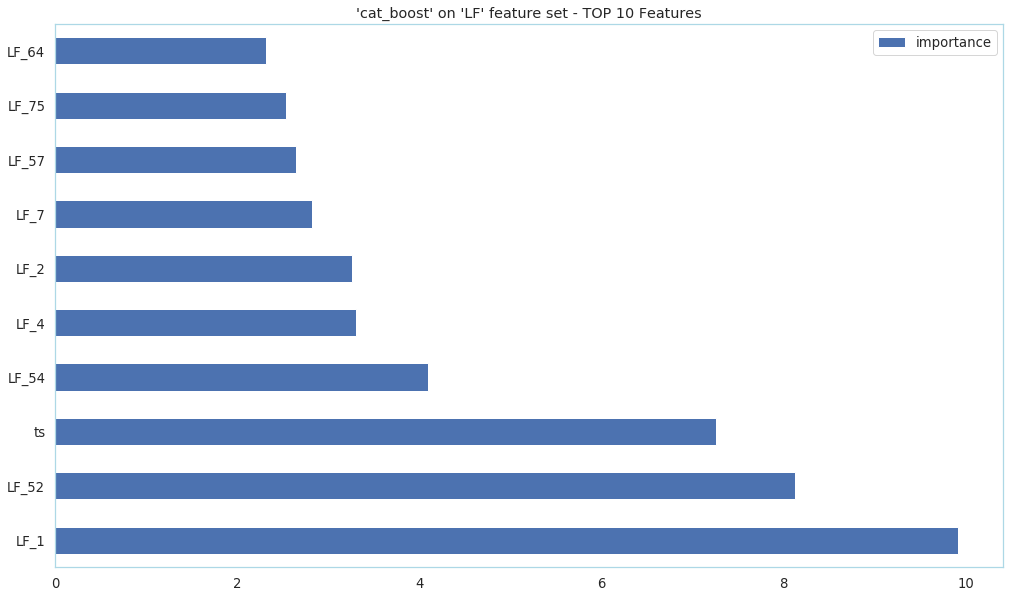

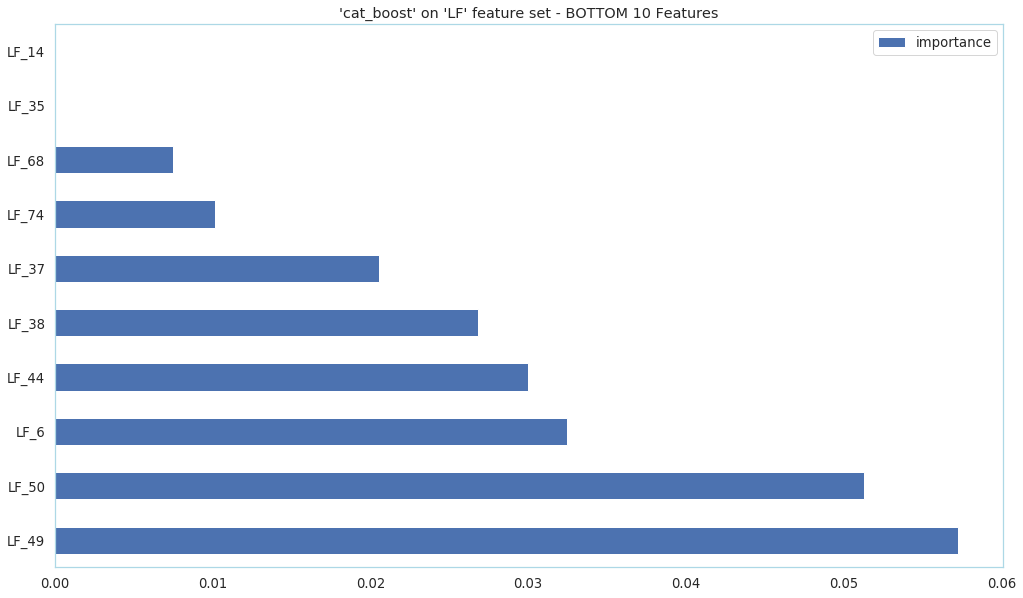

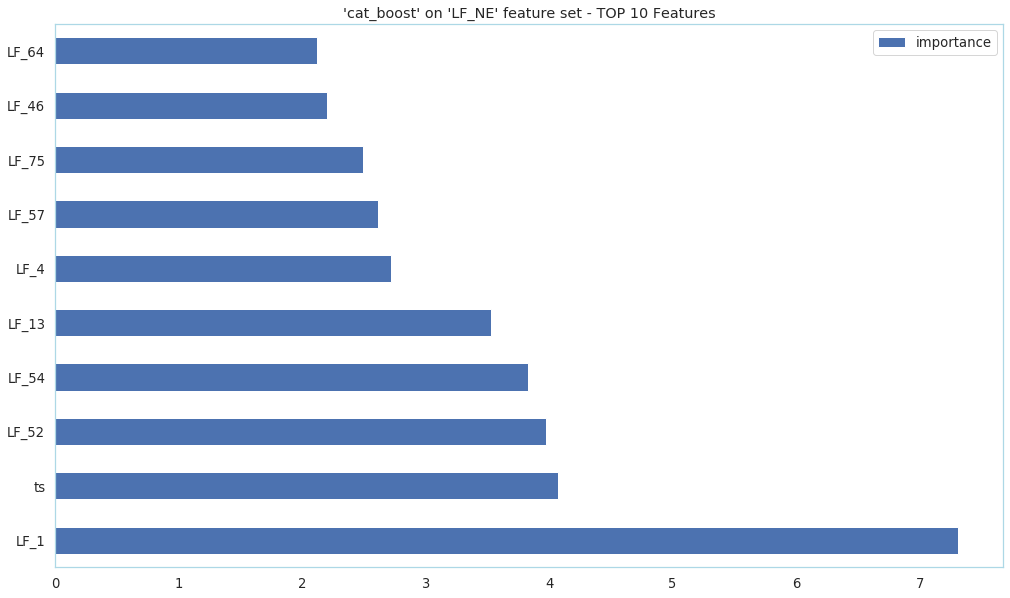

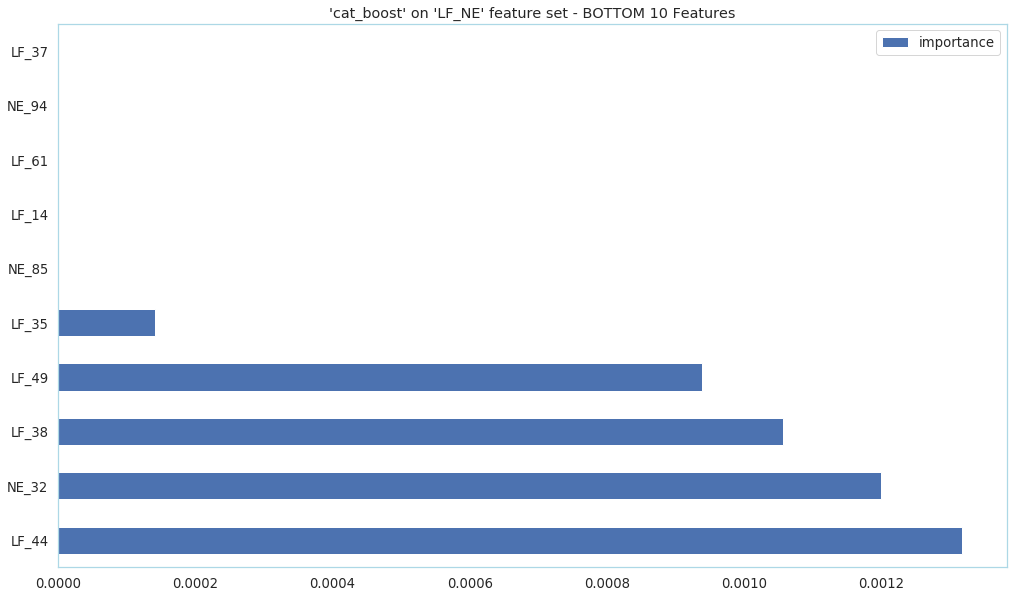

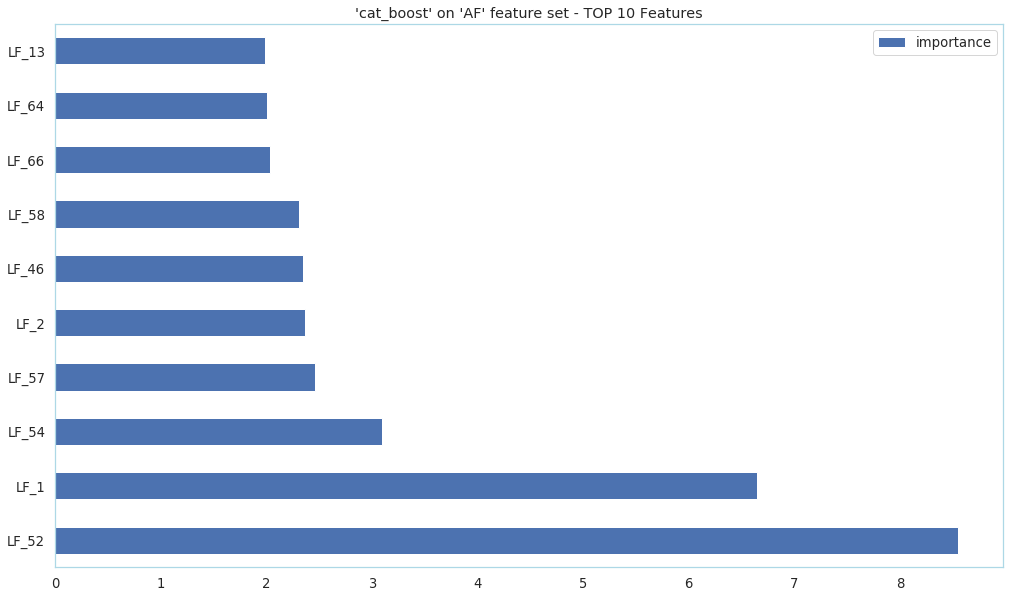

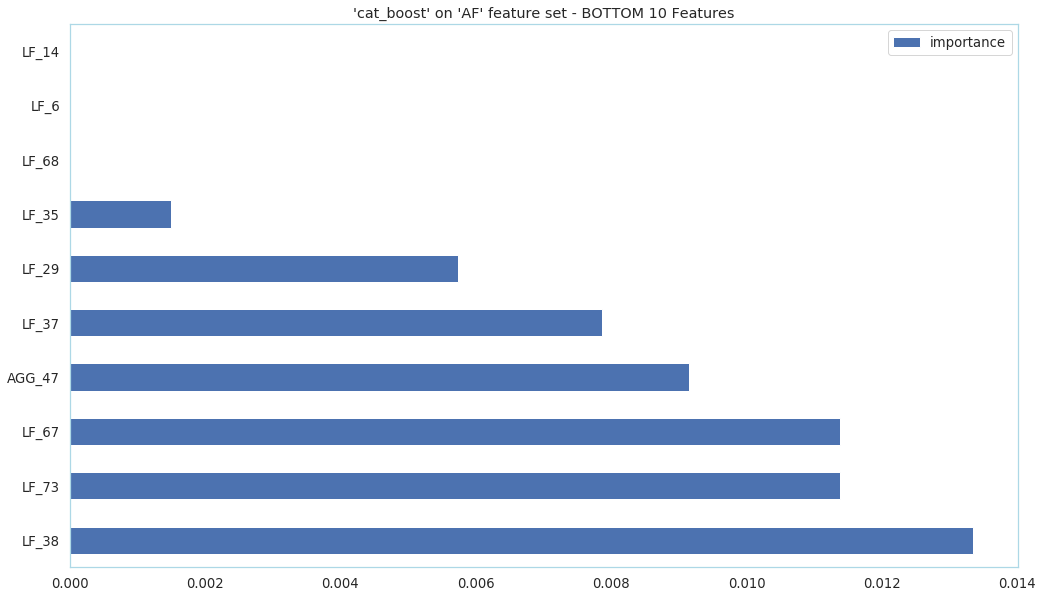

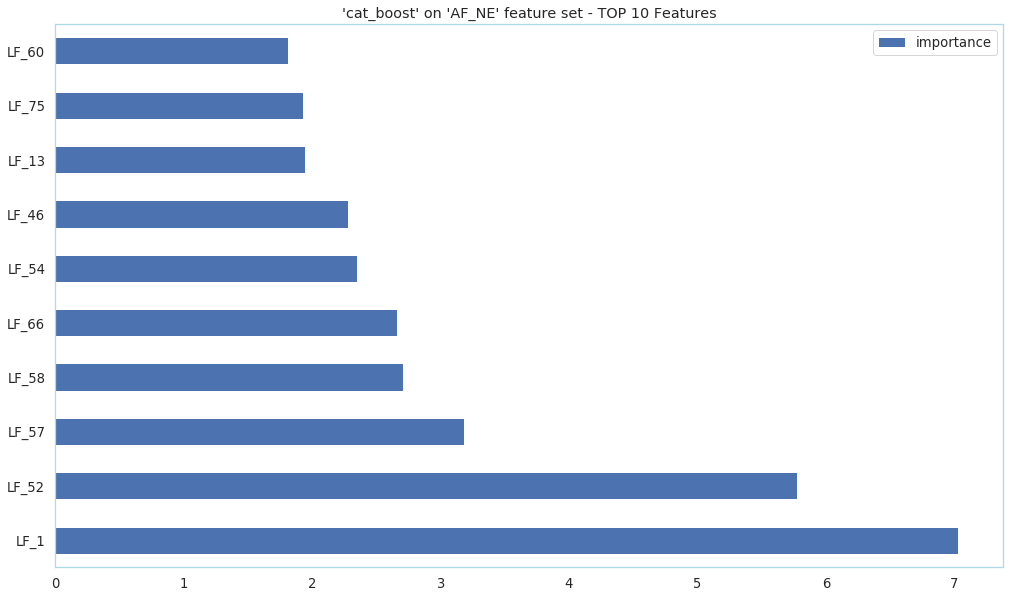

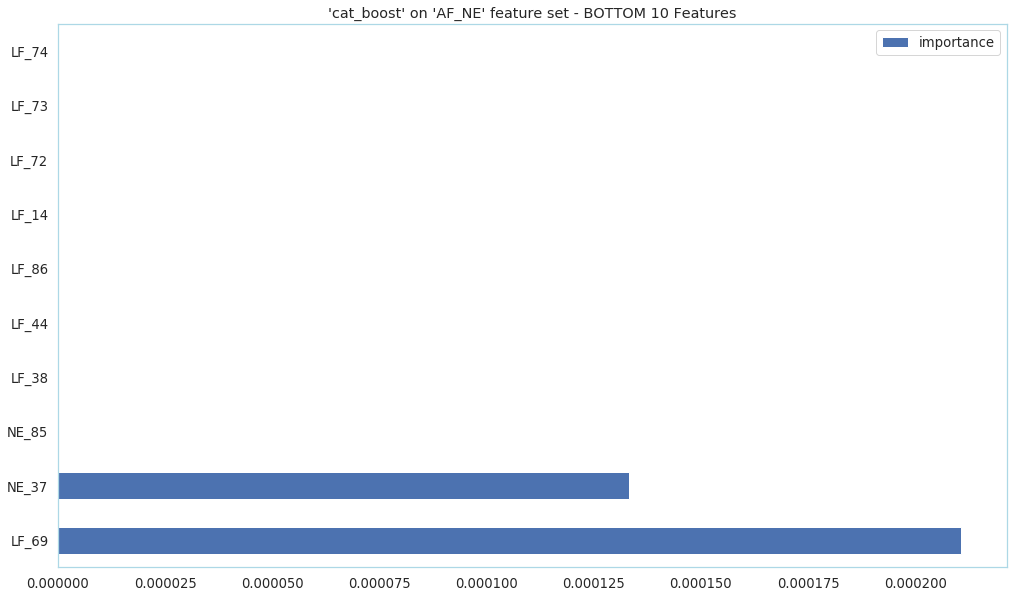

In [12]:
# loop and show top N and bottom N feature importances 
N = 10
for model_key, model_value in default_results.items():
    for feature_set, feature_set_value in model_value.items():       
        title = "'{}' on '{}' feature set - TOP {} Features".format(model_key, feature_set, N)
        ax = feature_set_value["importance"].head(N).plot.barh(rot=0,
                                                               title=title,
                                                               figsize=(17,10))
        plt.show()
        title = "'{}' on '{}' feature set - BOTTOM {} Features".format(model_key, feature_set, N)
        ax = feature_set_value["importance"].tail(N).plot.barh(rot=0,
                                                               title=title,
                                                               figsize=(17,10))
        plt.show()
        display(HTML("</hr>"))

In [14]:
# loop and print parameters for each model and feature set 
for model_key, model_value in default_results.items():
    for feature_set, feature_set_value in model_value.items():
        print("Parameters used for '{}' on '{}' feature set".format(model_key, feature_set))
        pp.pprint(feature_set_value["params"])
        display(HTML("</hr>"))

Parameters used for 'xg_boost' on 'LF' feature set
{   'base_score': 0.5,
    'booster': None,
    'colsample_bylevel': 1,
    'colsample_bynode': 1,
    'colsample_bytree': 1,
    'gamma': 0,
    'gpu_id': -1,
    'importance_type': 'gain',
    'interaction_constraints': None,
    'learning_rate': 0.300000012,
    'max_delta_step': 0,
    'max_depth': 6,
    'min_child_weight': 1,
    'missing': nan,
    'monotone_constraints': None,
    'n_estimators': 100,
    'n_jobs': 0,
    'num_parallel_tree': 1,
    'objective': 'binary:logistic',
    'random_state': 0,
    'reg_alpha': 0,
    'reg_lambda': 1,
    'scale_pos_weight': 1,
    'subsample': 1,
    'tree_method': None,
    'validate_parameters': False,
    'verbosity': None}


Parameters used for 'xg_boost' on 'LF_NE' feature set
{   'base_score': 0.5,
    'booster': None,
    'colsample_bylevel': 1,
    'colsample_bynode': 1,
    'colsample_bytree': 1,
    'gamma': 0,
    'gpu_id': -1,
    'importance_type': 'gain',
    'interaction_constraints': None,
    'learning_rate': 0.300000012,
    'max_delta_step': 0,
    'max_depth': 6,
    'min_child_weight': 1,
    'missing': nan,
    'monotone_constraints': None,
    'n_estimators': 100,
    'n_jobs': 0,
    'num_parallel_tree': 1,
    'objective': 'binary:logistic',
    'random_state': 0,
    'reg_alpha': 0,
    'reg_lambda': 1,
    'scale_pos_weight': 1,
    'subsample': 1,
    'tree_method': None,
    'validate_parameters': False,
    'verbosity': None}


Parameters used for 'xg_boost' on 'AF' feature set
{   'base_score': 0.5,
    'booster': None,
    'colsample_bylevel': 1,
    'colsample_bynode': 1,
    'colsample_bytree': 1,
    'gamma': 0,
    'gpu_id': -1,
    'importance_type': 'gain',
    'interaction_constraints': None,
    'learning_rate': 0.300000012,
    'max_delta_step': 0,
    'max_depth': 6,
    'min_child_weight': 1,
    'missing': nan,
    'monotone_constraints': None,
    'n_estimators': 100,
    'n_jobs': 0,
    'num_parallel_tree': 1,
    'objective': 'binary:logistic',
    'random_state': 0,
    'reg_alpha': 0,
    'reg_lambda': 1,
    'scale_pos_weight': 1,
    'subsample': 1,
    'tree_method': None,
    'validate_parameters': False,
    'verbosity': None}


Parameters used for 'xg_boost' on 'AF_NE' feature set
{   'base_score': 0.5,
    'booster': None,
    'colsample_bylevel': 1,
    'colsample_bynode': 1,
    'colsample_bytree': 1,
    'gamma': 0,
    'gpu_id': -1,
    'importance_type': 'gain',
    'interaction_constraints': None,
    'learning_rate': 0.300000012,
    'max_delta_step': 0,
    'max_depth': 6,
    'min_child_weight': 1,
    'missing': nan,
    'monotone_constraints': None,
    'n_estimators': 100,
    'n_jobs': 0,
    'num_parallel_tree': 1,
    'objective': 'binary:logistic',
    'random_state': 0,
    'reg_alpha': 0,
    'reg_lambda': 1,
    'scale_pos_weight': 1,
    'subsample': 1,
    'tree_method': None,
    'validate_parameters': False,
    'verbosity': None}


Parameters used for 'light_boost' on 'LF' feature set
{   'boosting_type': 'gbdt',
    'class_weight': None,
    'colsample_bytree': 1.0,
    'importance_type': 'split',
    'learning_rate': 0.1,
    'max_depth': -1,
    'min_child_samples': 20,
    'min_child_weight': 0.001,
    'min_split_gain': 0.0,
    'n_estimators': 100,
    'n_jobs': -1,
    'num_leaves': 31,
    'objective': None,
    'random_state': None,
    'reg_alpha': 0.0,
    'reg_lambda': 0.0,
    'silent': True,
    'subsample': 1.0,
    'subsample_for_bin': 200000,
    'subsample_freq': 0}


Parameters used for 'light_boost' on 'LF_NE' feature set
{   'boosting_type': 'gbdt',
    'class_weight': None,
    'colsample_bytree': 1.0,
    'importance_type': 'split',
    'learning_rate': 0.1,
    'max_depth': -1,
    'min_child_samples': 20,
    'min_child_weight': 0.001,
    'min_split_gain': 0.0,
    'n_estimators': 100,
    'n_jobs': -1,
    'num_leaves': 31,
    'objective': None,
    'random_state': None,
    'reg_alpha': 0.0,
    'reg_lambda': 0.0,
    'silent': True,
    'subsample': 1.0,
    'subsample_for_bin': 200000,
    'subsample_freq': 0}


Parameters used for 'light_boost' on 'AF' feature set
{   'boosting_type': 'gbdt',
    'class_weight': None,
    'colsample_bytree': 1.0,
    'importance_type': 'split',
    'learning_rate': 0.1,
    'max_depth': -1,
    'min_child_samples': 20,
    'min_child_weight': 0.001,
    'min_split_gain': 0.0,
    'n_estimators': 100,
    'n_jobs': -1,
    'num_leaves': 31,
    'objective': None,
    'random_state': None,
    'reg_alpha': 0.0,
    'reg_lambda': 0.0,
    'silent': True,
    'subsample': 1.0,
    'subsample_for_bin': 200000,
    'subsample_freq': 0}


Parameters used for 'light_boost' on 'AF_NE' feature set
{   'boosting_type': 'gbdt',
    'class_weight': None,
    'colsample_bytree': 1.0,
    'importance_type': 'split',
    'learning_rate': 0.1,
    'max_depth': -1,
    'min_child_samples': 20,
    'min_child_weight': 0.001,
    'min_split_gain': 0.0,
    'n_estimators': 100,
    'n_jobs': -1,
    'num_leaves': 31,
    'objective': None,
    'random_state': None,
    'reg_alpha': 0.0,
    'reg_lambda': 0.0,
    'silent': True,
    'subsample': 1.0,
    'subsample_for_bin': 200000,
    'subsample_freq': 0}


Parameters used for 'cat_boost' on 'LF' feature set
{   'approx_on_full_history': False,
    'bayesian_matrix_reg': 0.1000000015,
    'best_model_min_trees': 1,
    'boost_from_average': False,
    'boosting_type': 'Plain',
    'bootstrap_type': 'MVS',
    'border_count': 254,
    'class_names': ['0', '1'],
    'classes_count': 0,
    'depth': 6,
    'eval_metric': 'Logloss',
    'feature_border_type': 'GreedyLogSum',
    'fold_len_multiplier': 2,
    'fold_permutation_block': 0,
    'has_time': False,
    'iterations': 1000,
    'l2_leaf_reg': 3,
    'leaf_estimation_backtracking': 'AnyImprovement',
    'leaf_estimation_iterations': 10,
    'leaf_estimation_method': 'Newton',
    'learning_rate': 0.04382399842,
    'loss_function': 'Logloss',
    'model_shrink_rate': 0,
    'model_size_reg': 0.5,
    'nan_mode': 'Min',
    'permutation_count': 4,
    'random_seed': 0,
    'random_strength': 1,
    'rsm': 1,
    'sampling_frequency': 'PerTree',
    'score_function': 'Cosine',
    'spar

Parameters used for 'cat_boost' on 'LF_NE' feature set
{   'approx_on_full_history': False,
    'bayesian_matrix_reg': 0.1000000015,
    'best_model_min_trees': 1,
    'boost_from_average': False,
    'boosting_type': 'Plain',
    'bootstrap_type': 'MVS',
    'border_count': 254,
    'class_names': ['0', '1'],
    'classes_count': 0,
    'depth': 6,
    'eval_metric': 'Logloss',
    'feature_border_type': 'GreedyLogSum',
    'fold_len_multiplier': 2,
    'fold_permutation_block': 0,
    'has_time': False,
    'iterations': 1000,
    'l2_leaf_reg': 3,
    'leaf_estimation_backtracking': 'AnyImprovement',
    'leaf_estimation_iterations': 10,
    'leaf_estimation_method': 'Newton',
    'learning_rate': 0.04382399842,
    'loss_function': 'Logloss',
    'model_shrink_rate': 0,
    'model_size_reg': 0.5,
    'nan_mode': 'Min',
    'permutation_count': 4,
    'random_seed': 0,
    'random_strength': 1,
    'rsm': 1,
    'sampling_frequency': 'PerTree',
    'score_function': 'Cosine',
    's

Parameters used for 'cat_boost' on 'AF' feature set
{   'approx_on_full_history': False,
    'bayesian_matrix_reg': 0.1000000015,
    'best_model_min_trees': 1,
    'boost_from_average': False,
    'boosting_type': 'Plain',
    'bootstrap_type': 'MVS',
    'border_count': 254,
    'class_names': ['0', '1'],
    'classes_count': 0,
    'depth': 6,
    'eval_metric': 'Logloss',
    'feature_border_type': 'GreedyLogSum',
    'fold_len_multiplier': 2,
    'fold_permutation_block': 0,
    'has_time': False,
    'iterations': 1000,
    'l2_leaf_reg': 3,
    'leaf_estimation_backtracking': 'AnyImprovement',
    'leaf_estimation_iterations': 10,
    'leaf_estimation_method': 'Newton',
    'learning_rate': 0.04382399842,
    'loss_function': 'Logloss',
    'model_shrink_rate': 0,
    'model_size_reg': 0.5,
    'nan_mode': 'Min',
    'permutation_count': 4,
    'random_seed': 0,
    'random_strength': 1,
    'rsm': 1,
    'sampling_frequency': 'PerTree',
    'score_function': 'Cosine',
    'spar

Parameters used for 'cat_boost' on 'AF_NE' feature set
{   'approx_on_full_history': False,
    'bayesian_matrix_reg': 0.1000000015,
    'best_model_min_trees': 1,
    'boost_from_average': False,
    'boosting_type': 'Plain',
    'bootstrap_type': 'MVS',
    'border_count': 254,
    'class_names': ['0', '1'],
    'classes_count': 0,
    'depth': 6,
    'eval_metric': 'Logloss',
    'feature_border_type': 'GreedyLogSum',
    'fold_len_multiplier': 2,
    'fold_permutation_block': 0,
    'has_time': False,
    'iterations': 1000,
    'l2_leaf_reg': 3,
    'leaf_estimation_backtracking': 'AnyImprovement',
    'leaf_estimation_iterations': 10,
    'leaf_estimation_method': 'Newton',
    'learning_rate': 0.04382399842,
    'loss_function': 'Logloss',
    'model_shrink_rate': 0,
    'model_size_reg': 0.5,
    'nan_mode': 'Min',
    'permutation_count': 4,
    'random_seed': 0,
    'random_strength': 1,
    'rsm': 1,
    'sampling_frequency': 'PerTree',
    'score_function': 'Cosine',
    's

## Tuned Parameters - Boosting Models
- [XGBoost: eXtreme Gradient Boosting](https://xgboost.readthedocs.io/en/latest/) 
- [LightGBM: Light Gradient Boosting Machine](https://lightgbm.readthedocs.io/en/latest/) 
- [CatBoost](https://catboost.ai/) 

In [4]:
# load results for tuned models
tuned_results = read_pickle(TUNED_RESULTS)

### Evaluation Metrics (Tuned)
- <i>Precision</i> 
- <i>Recall</i> 
- <i>F1</i>
- <i>F1 Micro Avg/Accuracy<i/>
- AUC
    
<small>
    <i>
    Italics text refers to metrics which were used in the benchmark paper.
    </i>
</small>

In [5]:
# dataframe with all the perfomance metrics
print("Performance metrics for tuned boosting models")
tuned_metrics_df = results_table(tuned_results)
display(tuned_metrics_df)

# sorted by f1 score
print("Performance metrics for tuned boosting models sorted by f1-score")
display(tuned_metrics_df.sort_values("f1", ascending=False))

Performance metrics for tuned boosting models


,model,precision,recall,f1_micro,accuracy,auc,f1
0,xg_boost_LF,0.912,0.689,0.975,0.975,0.842,0.785
1,xg_boost_LF_NE,0.989,0.687,0.979,0.979,0.843,0.811
2,xg_boost_AF,0.927,0.724,0.978,0.978,0.860,0.813
3,xg_boost_AF_NE,0.984,0.697,0.980,0.980,0.848,0.816
4,light_boost_LF,0.903,0.704,0.976,0.976,0.849,0.791
5,light_boost_LF_NE,0.987,0.686,0.979,0.979,0.843,0.809
6,light_boost_AF,0.945,0.718,0.979,0.979,0.858,0.816
7,light_boost_AF_NE,0.982,0.692,0.979,0.979,0.845,0.811
8,cat_boost_LF,0.837,0.720,0.973,0.973,0.855,0.774
9,cat_boost_LF_NE,0.956,0.688,0.978,0.978,0.843,0.800


Performance metrics for tuned boosting models sorted by f1-score


,model,precision,recall,f1_micro,accuracy,auc,f1
10,cat_boost_AF,0.946,0.732,0.980,0.980,0.865,0.826
11,cat_boost_AF_NE,0.977,0.702,0.980,0.980,0.850,0.817
3,xg_boost_AF_NE,0.984,0.697,0.980,0.980,0.848,0.816
6,light_boost_AF,0.945,0.718,0.979,0.979,0.858,0.816
2,xg_boost_AF,0.927,0.724,0.978,0.978,0.860,0.813
1,xg_boost_LF_NE,0.989,0.687,0.979,0.979,0.843,0.811
7,light_boost_AF_NE,0.982,0.692,0.979,0.979,0.845,0.811
5,light_boost_LF_NE,0.987,0.686,0.979,0.979,0.843,0.809
9,cat_boost_LF_NE,0.956,0.688,0.978,0.978,0.843,0.800
4,light_boost_LF,0.903,0.704,0.976,0.976,0.849,0.791


### Confusion Matrices (Tuned)

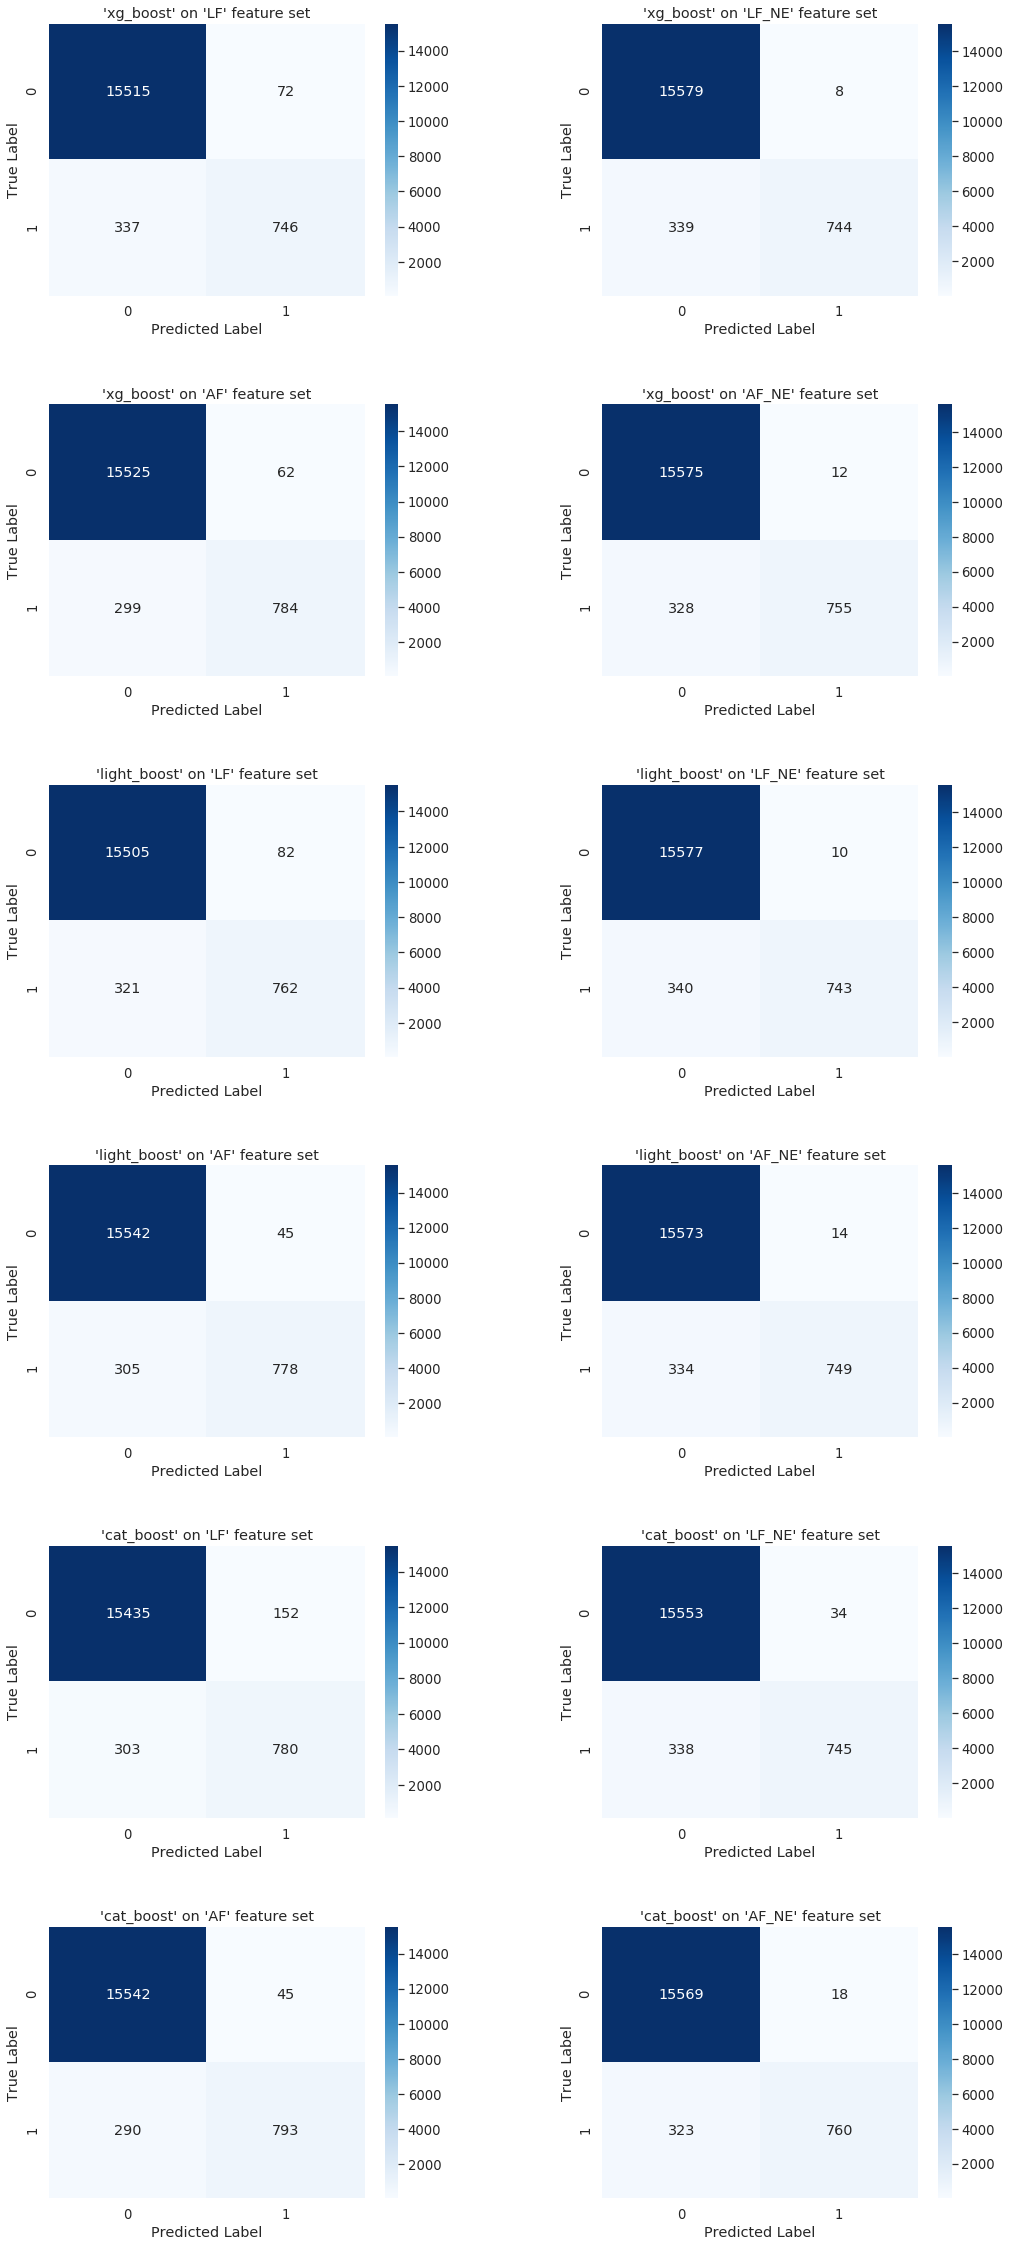

In [6]:
# loop and extract confusion matrices 
confusion_matrices = []
for model_key, model_value in tuned_results.items():
    for feature_set, feature_set_value in model_value.items():
        plot_title = "'{}' on '{}' feature set".format(model_key,feature_set)
        confusion_matrix = feature_set_value["metrics"]["confusion"]
        confusion_matrices.append((plot_title, confusion_matrix))

# display plots 
plot_confusion_matrix(matrices=confusion_matrices, figsize=(17,40))

### F1 Results over Test Time Span (Tuned)

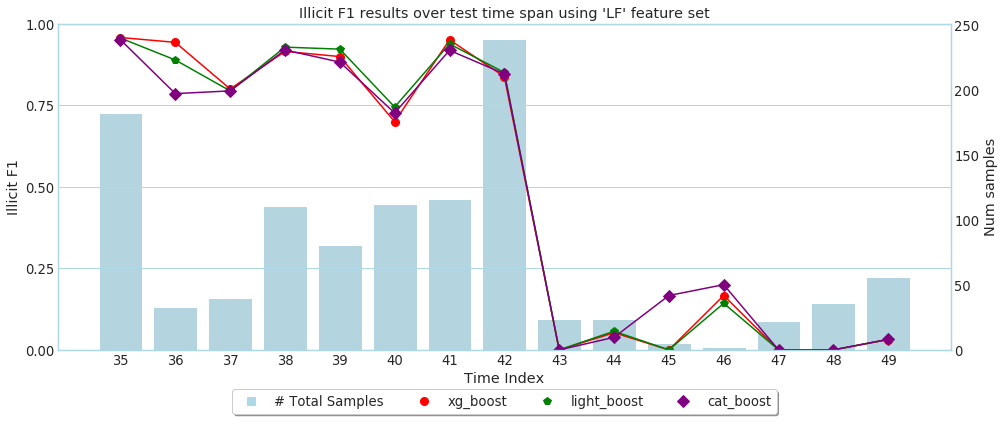

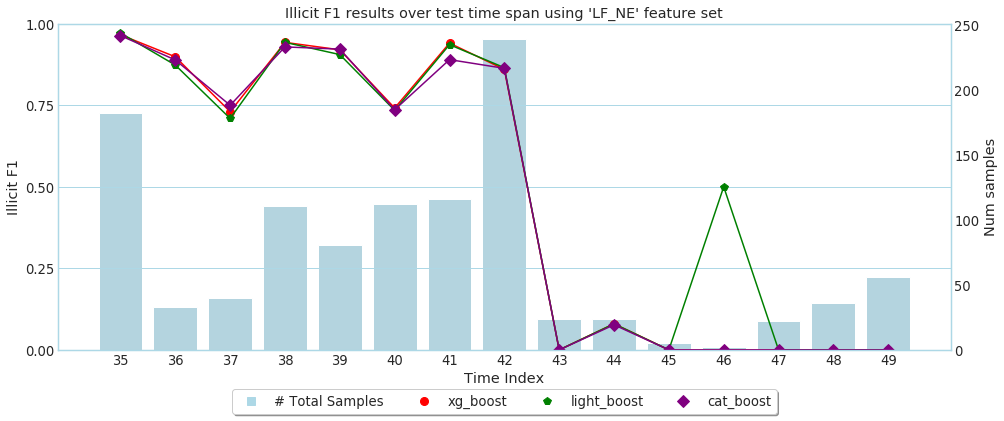

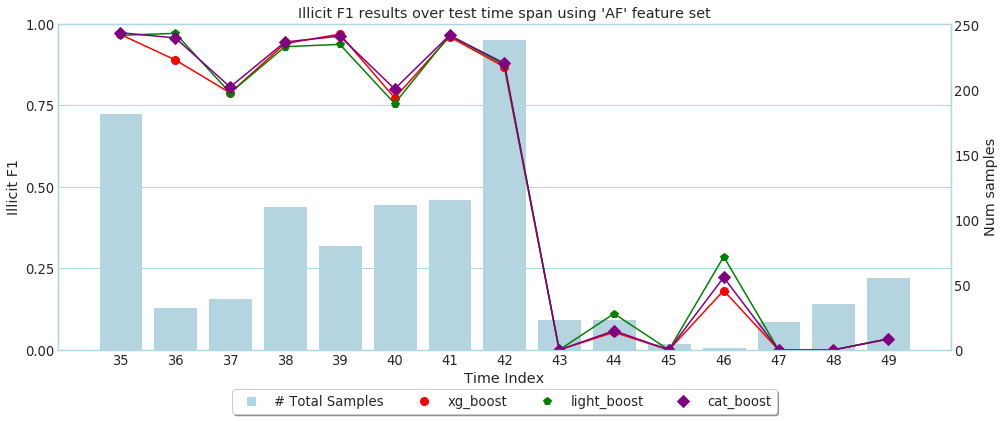

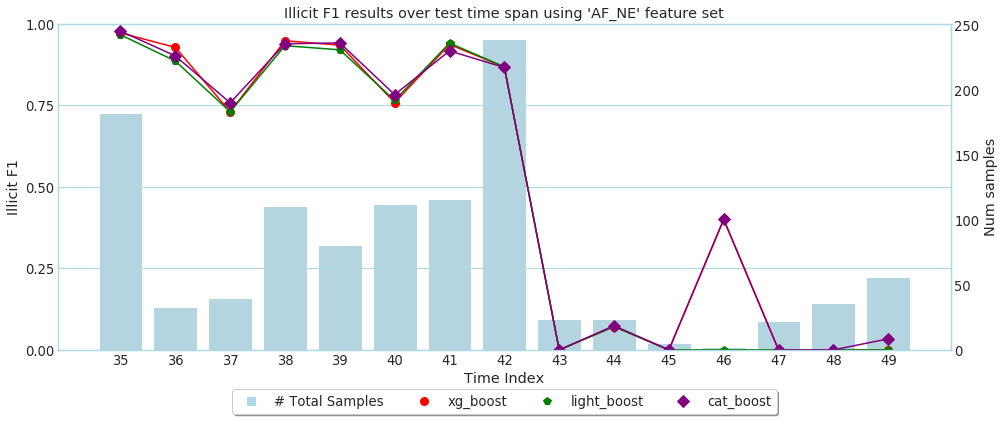

In [7]:
# loop and extract time indexed f1 score for each feature set 
tuned_results_time_results = {}
for model_key, model_value in tuned_results.items():
    for feature_set, feature_set_value in model_value.items(): 
        tmp_time_metrics = feature_set_value["time_metrics"]
        if feature_set not in tuned_results_time_results:
            tuned_results_time_results[feature_set] = {}
            tuned_results_time_results[feature_set]["scores"] = []
            tuned_results_time_results[feature_set]["timestep"] = tmp_time_metrics["timestep"]
            tuned_results_time_results[feature_set]["total_pos_label"] = tmp_time_metrics["total_pos_label"]
        tuned_results_time_results[feature_set]["scores"].append((model_key, tmp_time_metrics["score"]))

# plot results over test time span 
for feat_key, time_results in tuned_results_time_results.items():
    plot_title = "Illicit F1 results over test time span using '{}' feature set".format(feat_key)
    plot_time_indexed_results(time_steps=time_results["timestep"],
                              indexed_total_samples=time_results["total_pos_label"],
                              indexed_scores=time_results["scores"],
                              metric_title="Illicit F1",
                              plot_title=plot_title)

### Feature Importance (Tuned)

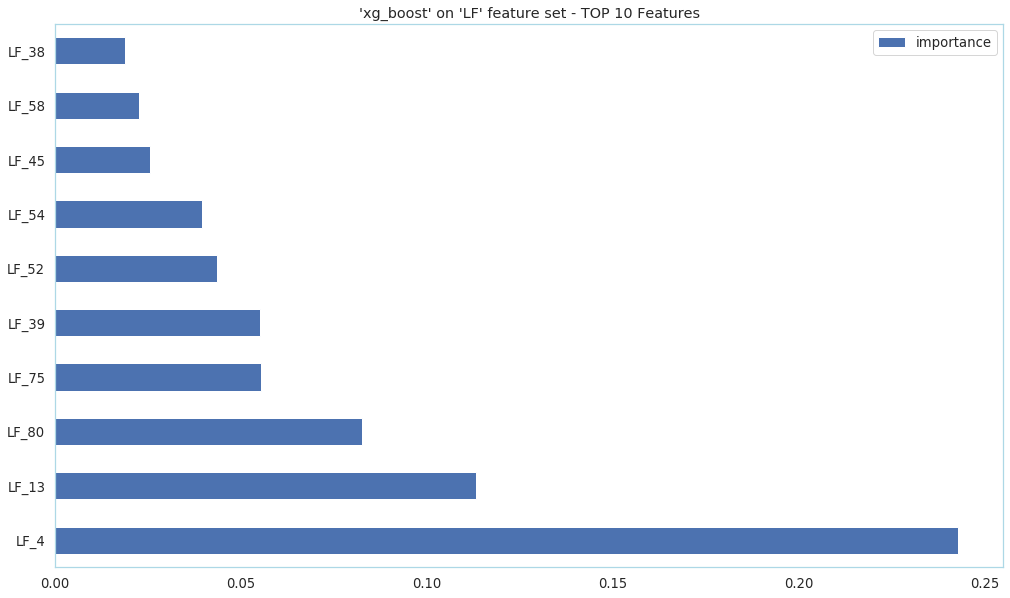

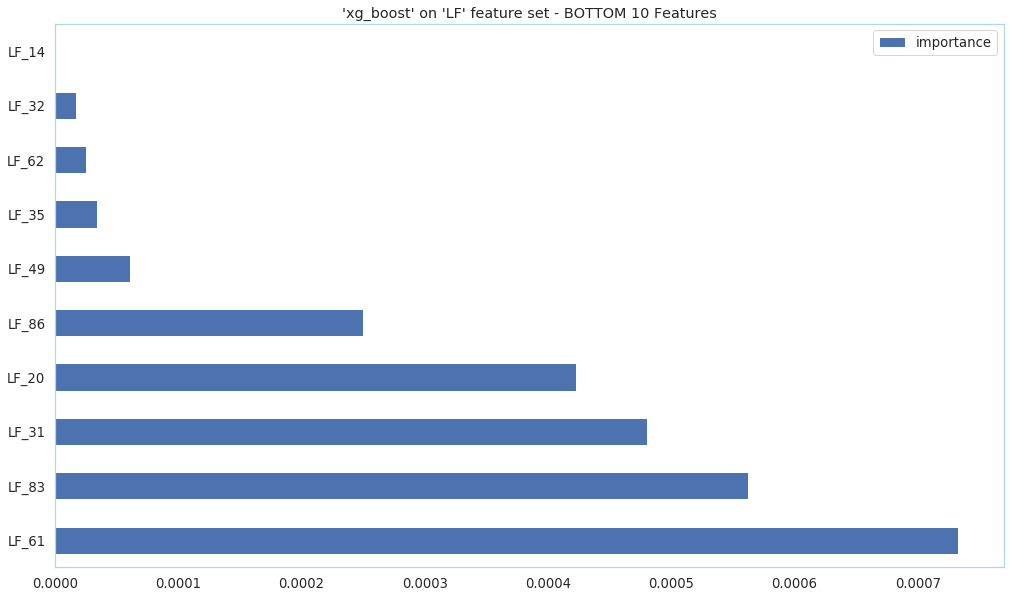

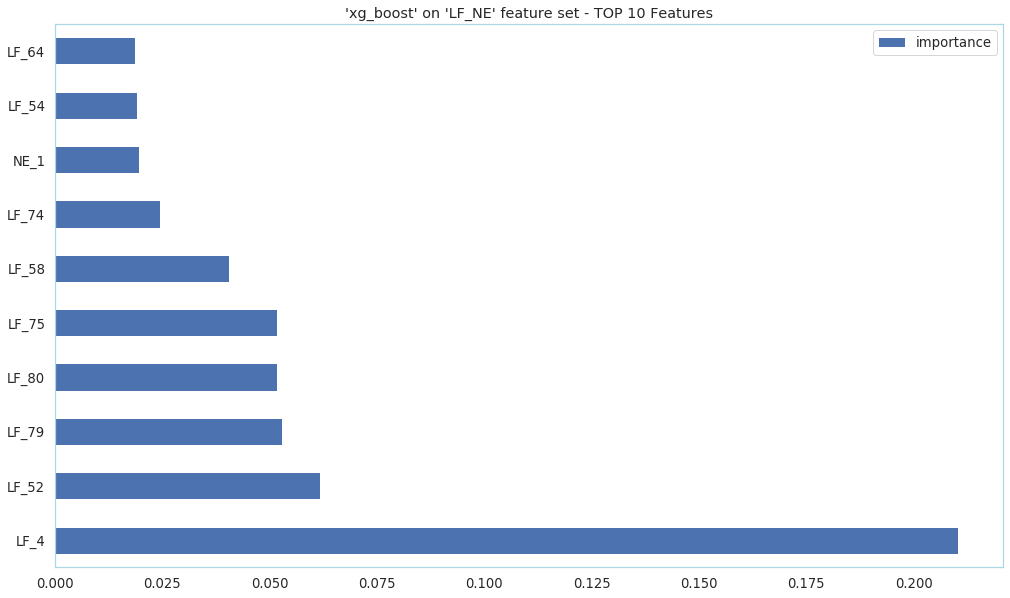

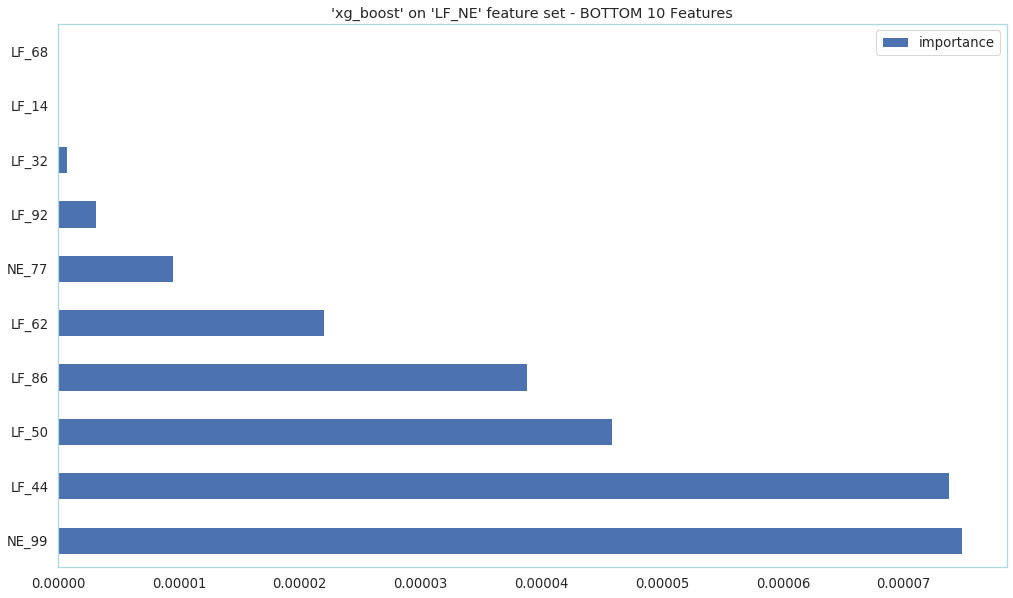

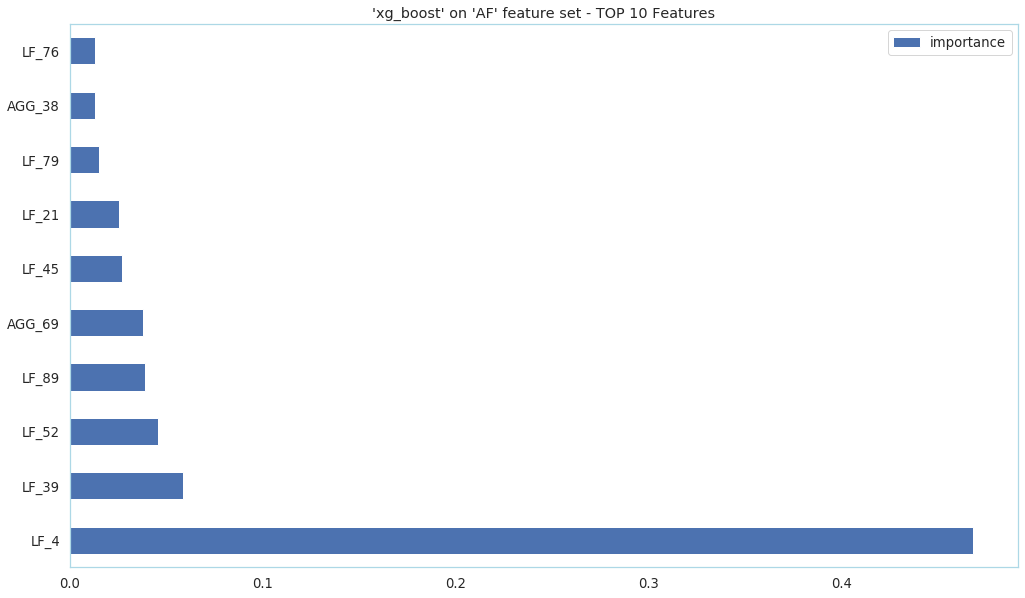

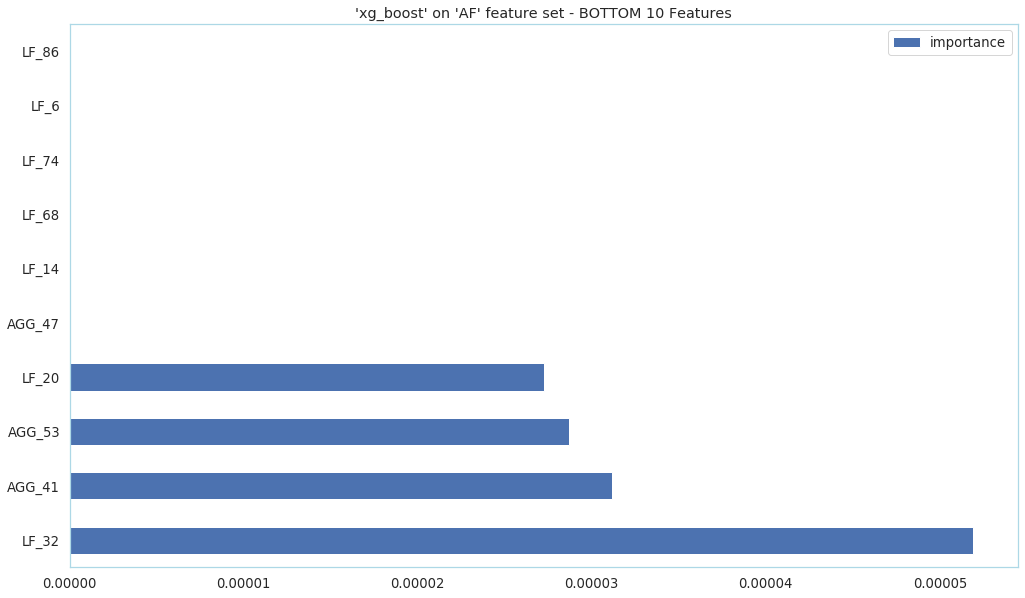

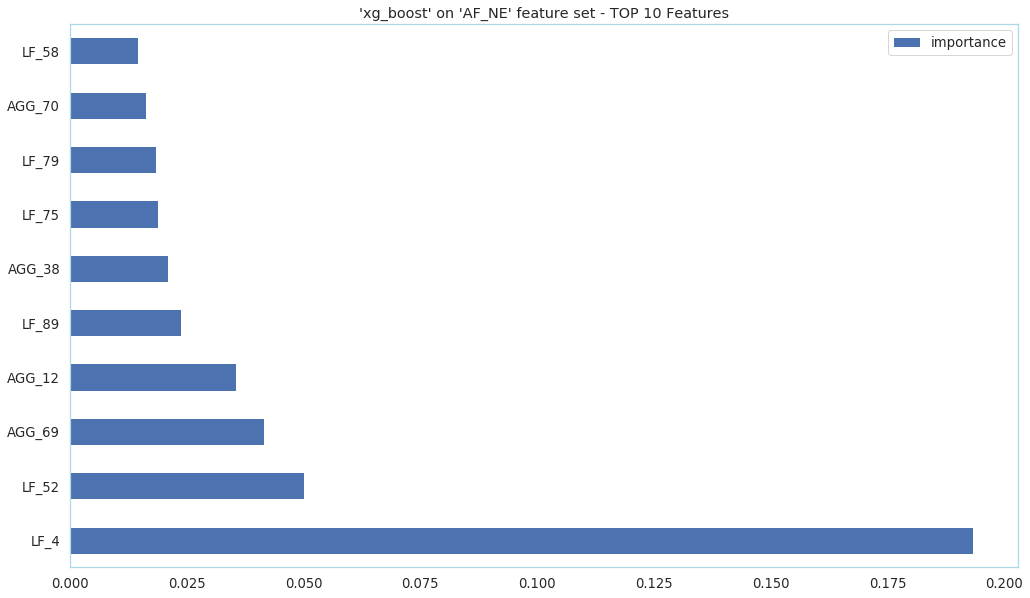

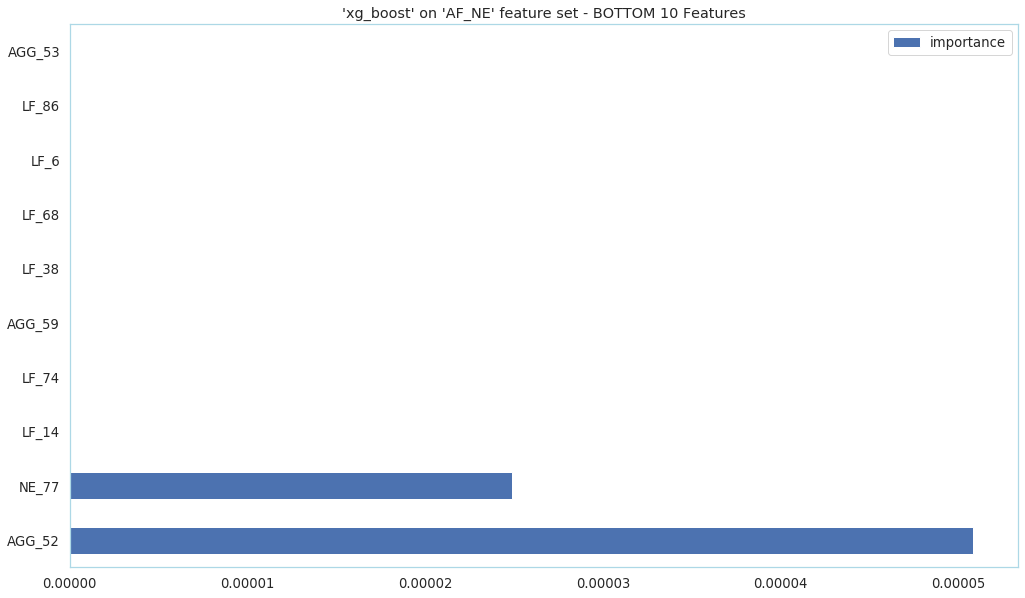

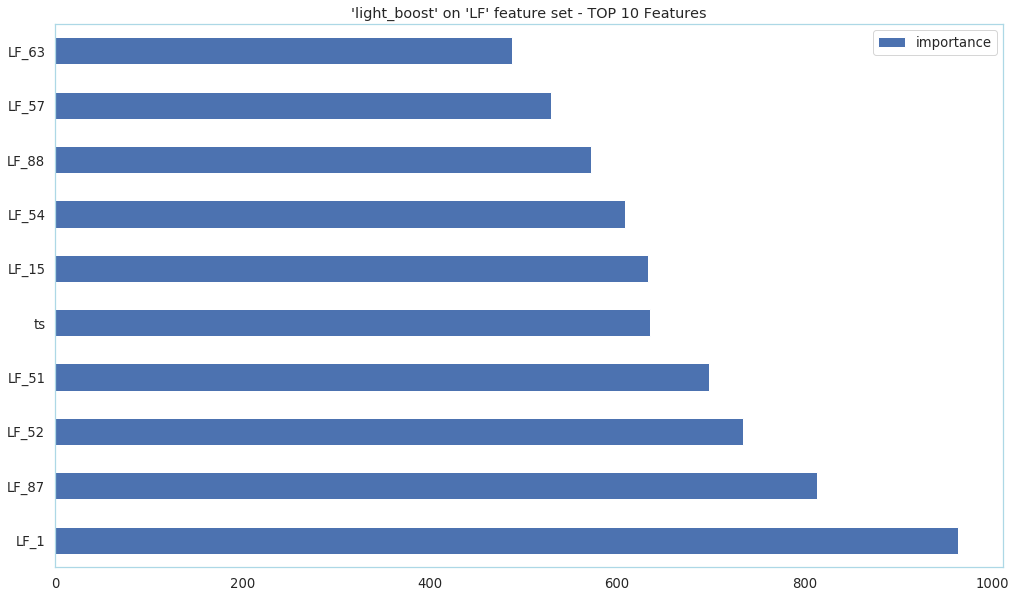

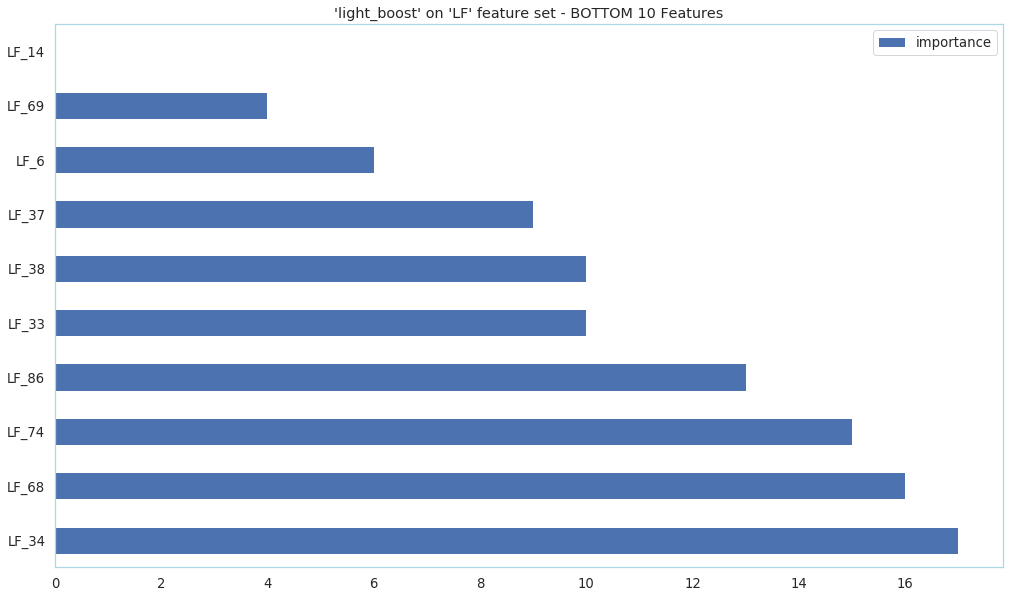

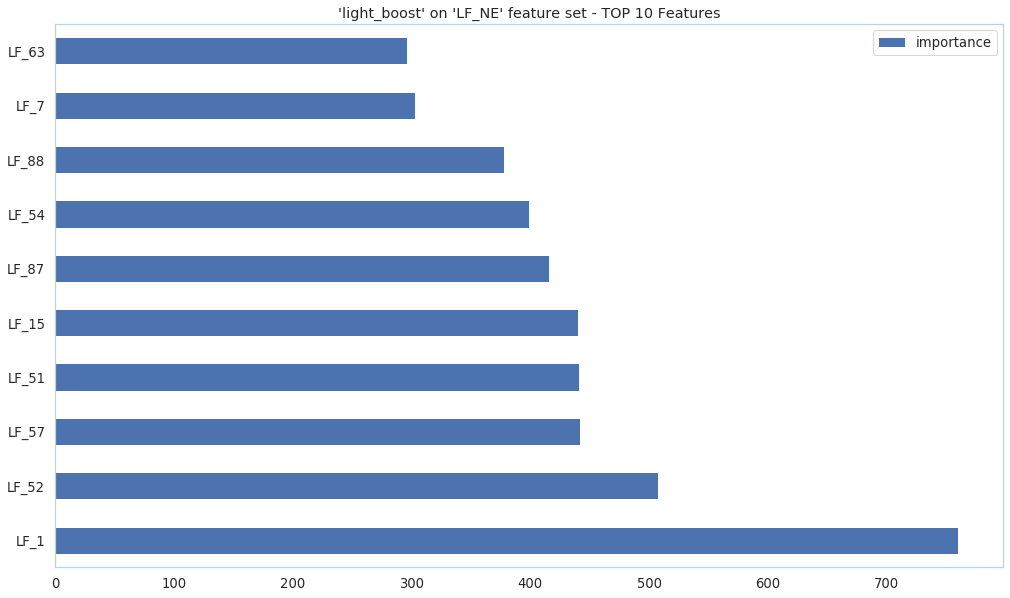

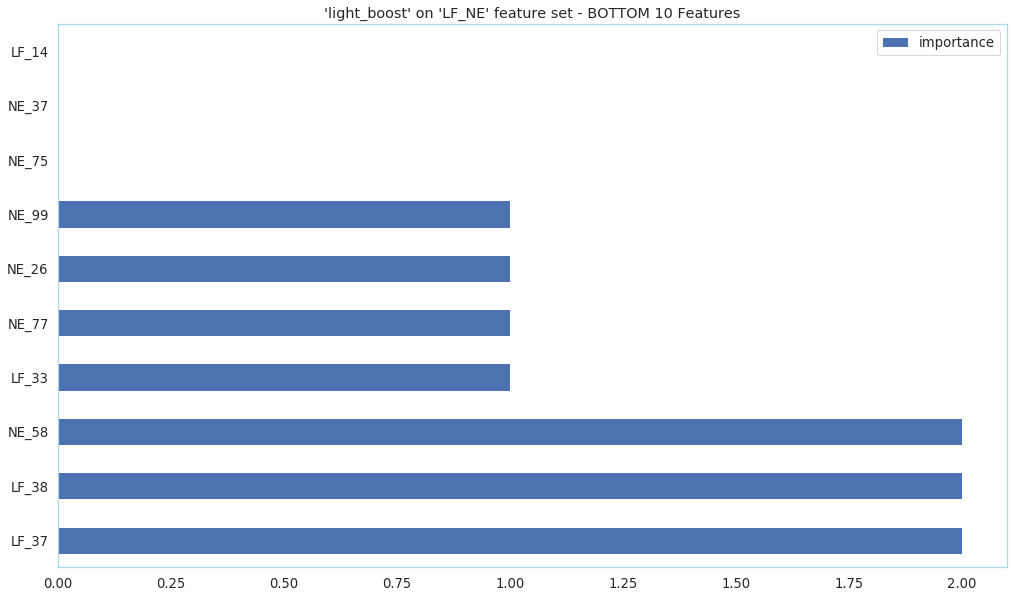

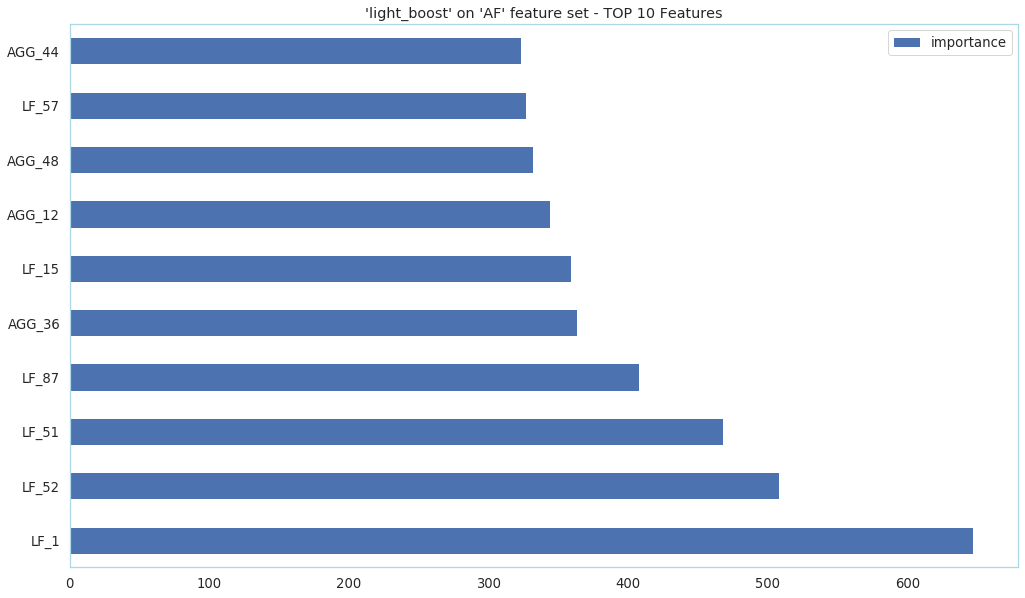

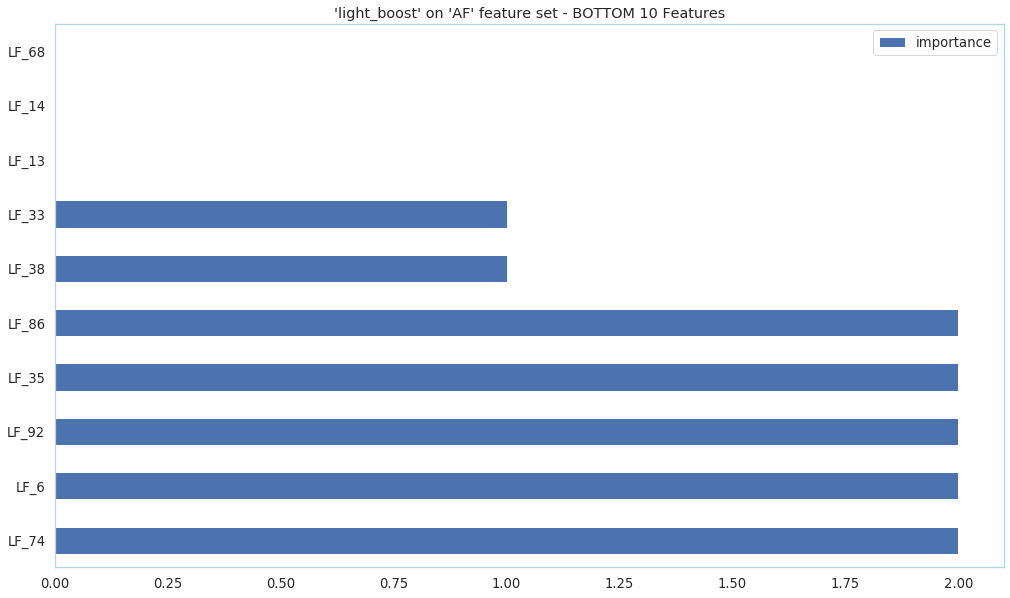

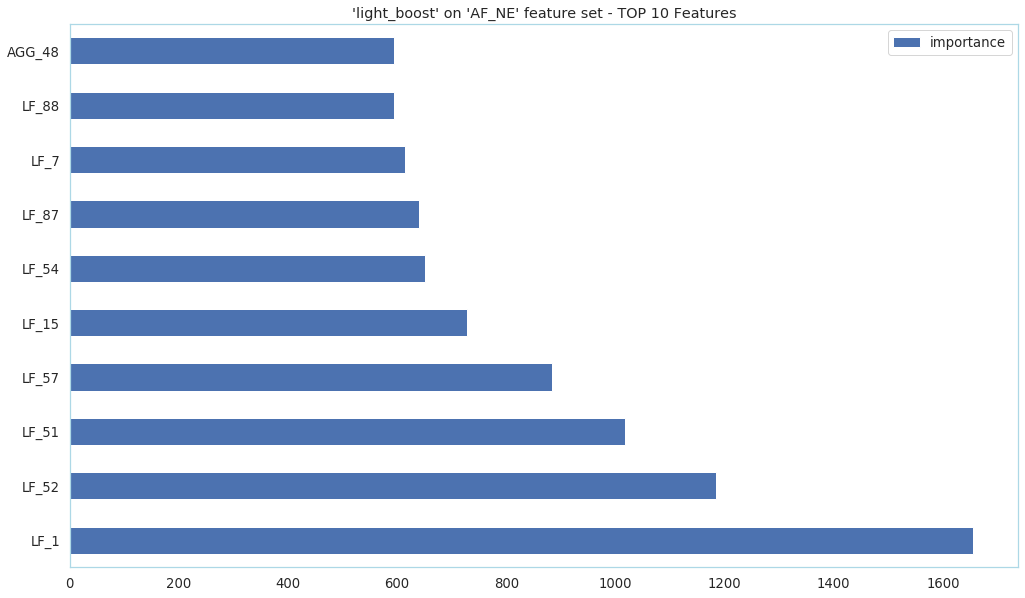

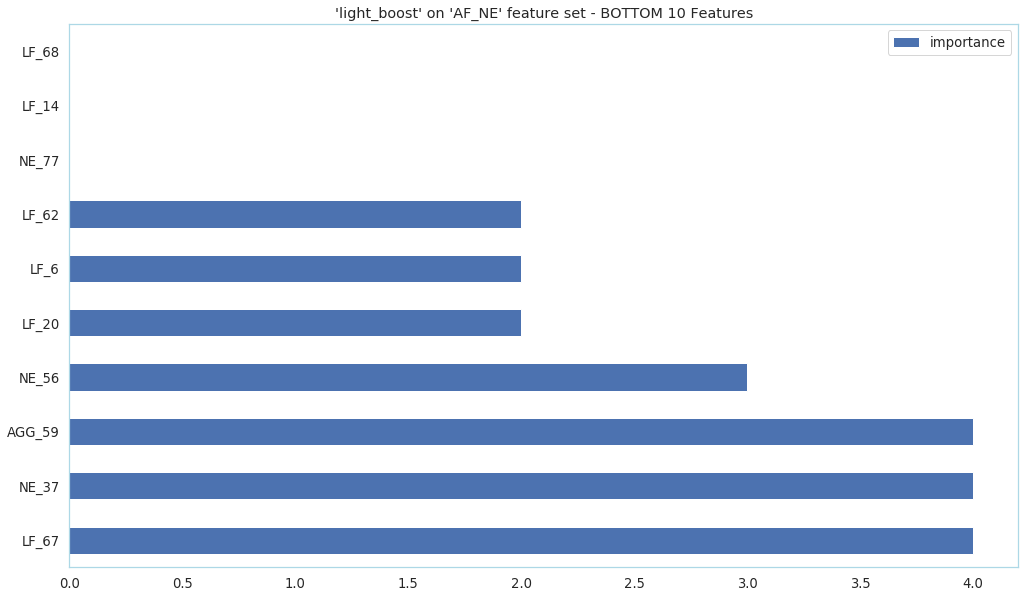

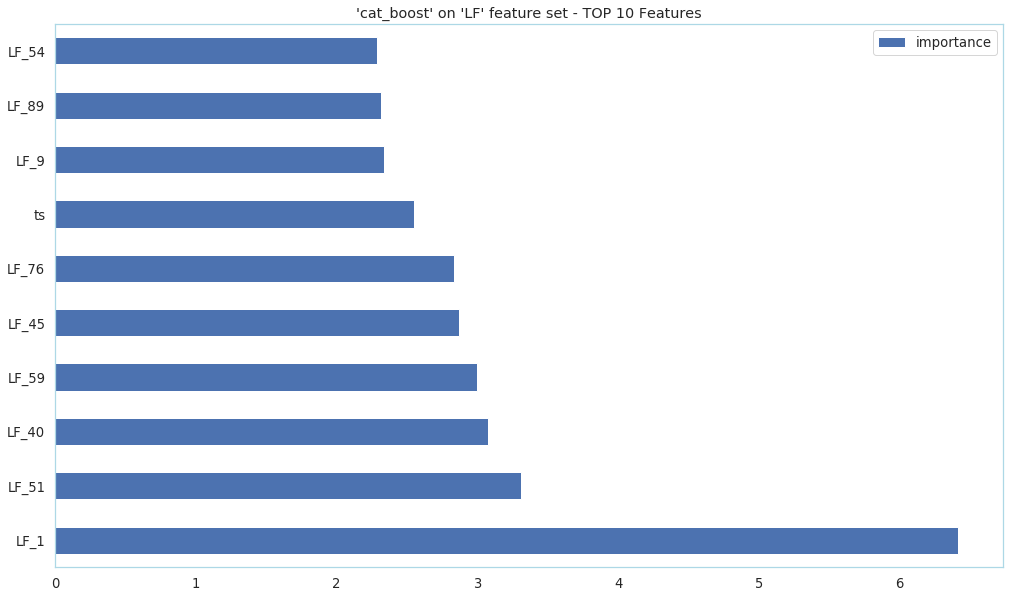

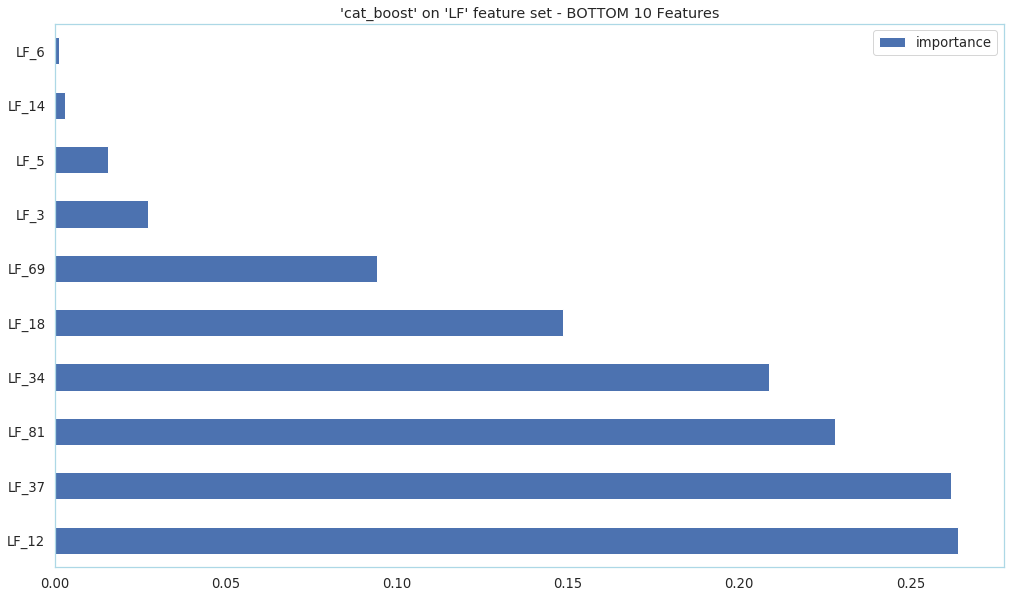

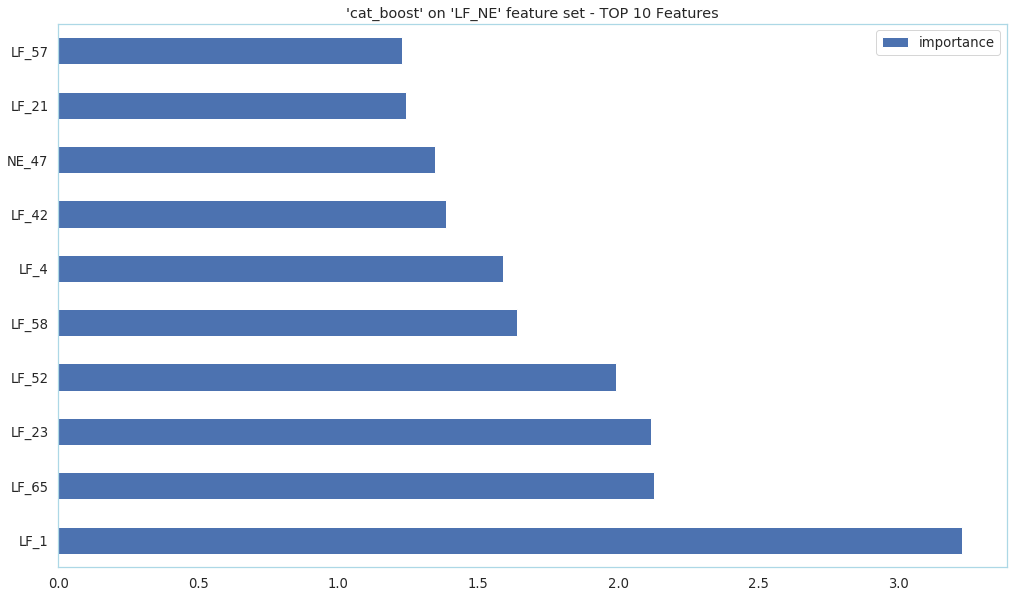

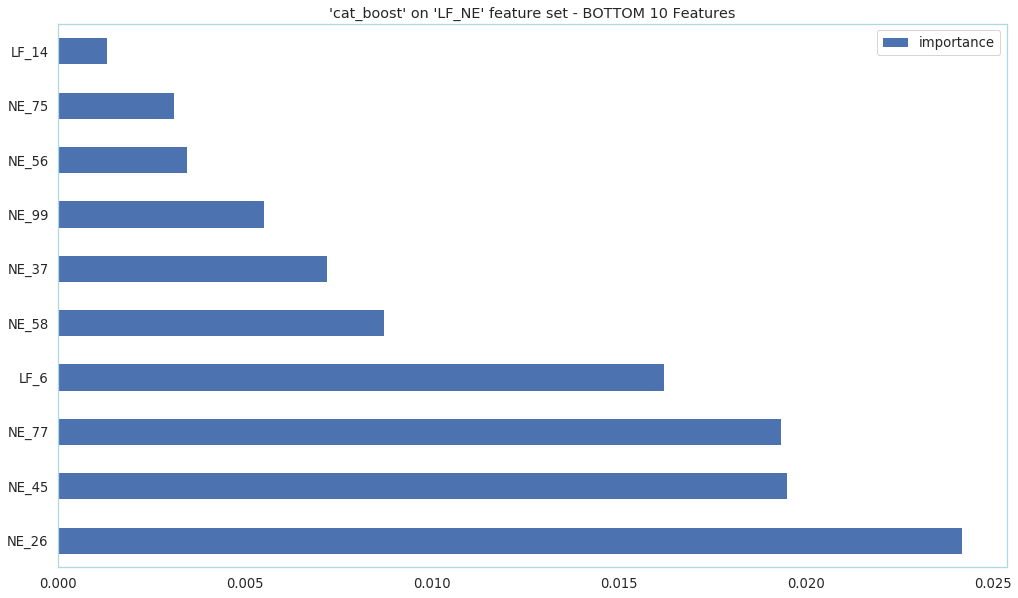

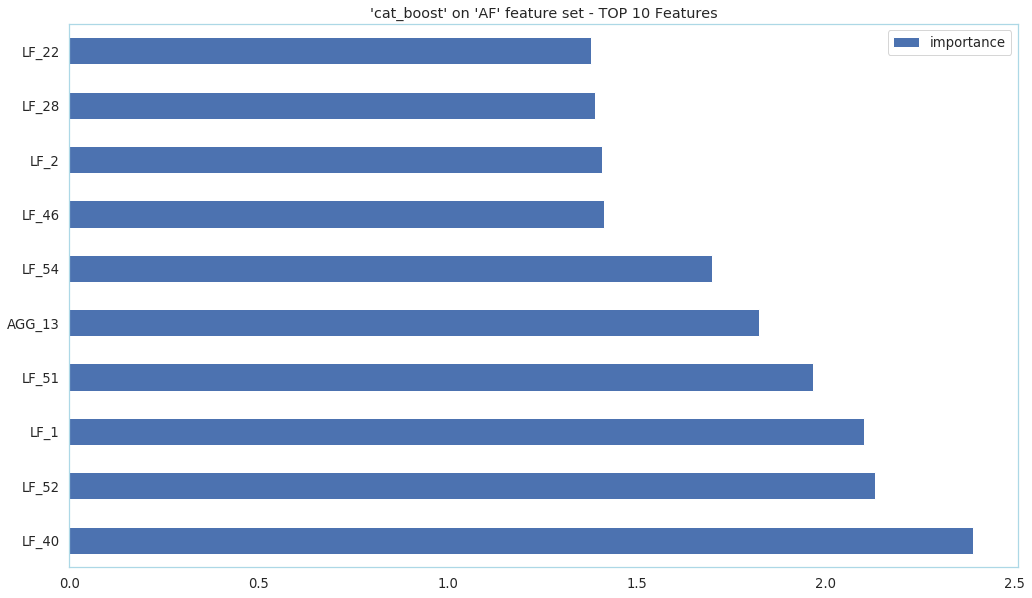

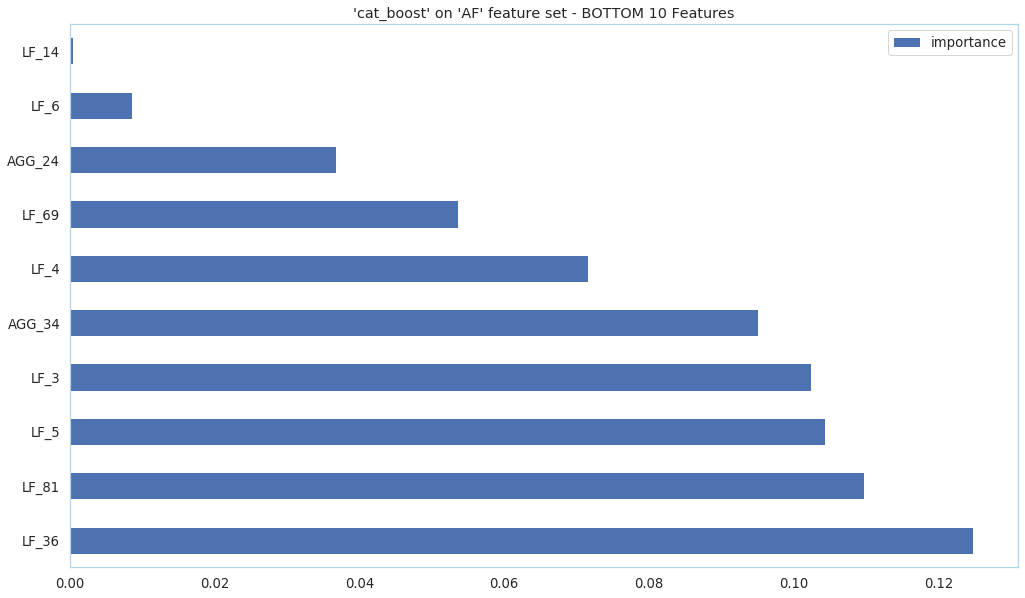

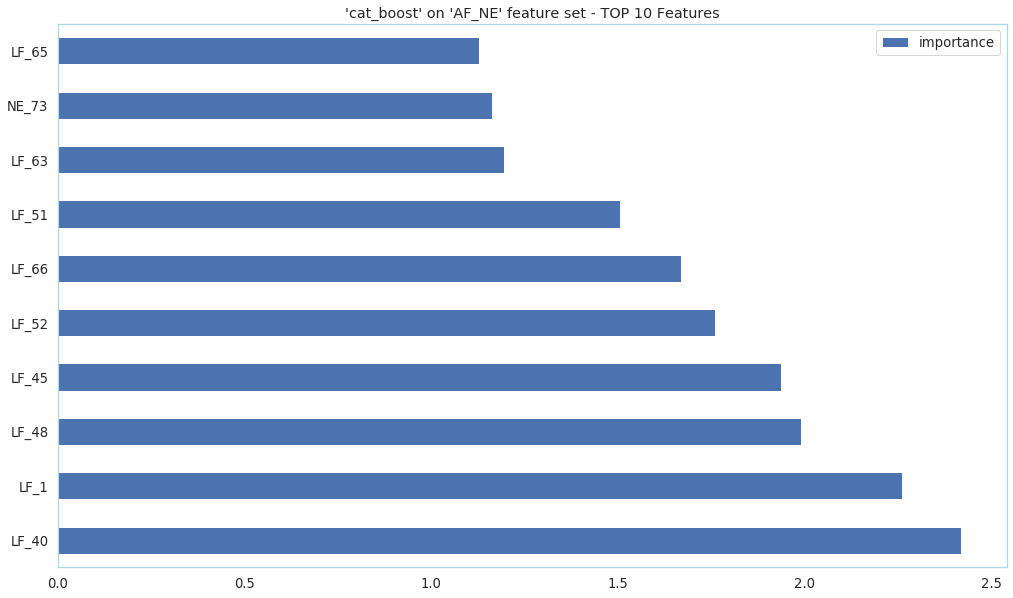

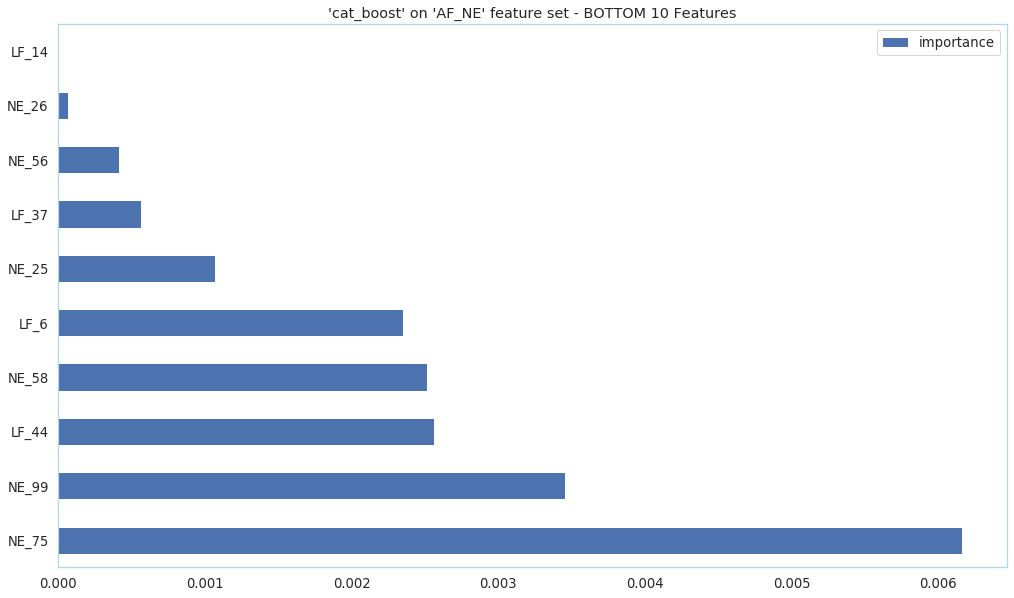

In [8]:
# loop and show top N and bottom N feature importances 
N = 10
for model_key, model_value in tuned_results.items():
    for feature_set, feature_set_value in model_value.items():       
        title = "'{}' on '{}' feature set - TOP {} Features".format(model_key, feature_set, N)
        ax = feature_set_value["importance"].head(N).plot.barh(rot=0,
                                                               title=title,
                                                               figsize=(17,10))
        plt.show()
        title = "'{}' on '{}' feature set - BOTTOM {} Features".format(model_key, feature_set, N)
        ax = feature_set_value["importance"].tail(N).plot.barh(rot=0,
                                                               title=title,
                                                               figsize=(17,10))
        plt.show()
        display(HTML("</hr>"))

### Hyperparameter Tuning Studies

TODO: Discuss what to show here with supervisors

### Model Parameters (Tuned)

In [9]:
# loop and print parameters for each model and feature set 
for model_key, model_value in tuned_results.items():
    for feature_set, feature_set_value in model_value.items():
        print("Parameters used for '{}' on '{}' feature set".format(model_key, feature_set))
        pp.pprint(feature_set_value["params"])
        display(HTML("</hr>"))

Parameters used for 'xg_boost' on 'LF' feature set
{   'base_score': 0.5,
    'booster': None,
    'colsample_bylevel': 1,
    'colsample_bynode': 1,
    'colsample_bytree': 0.9189218108942864,
    'gamma': 0.00125,
    'gpu_id': -1,
    'importance_type': 'gain',
    'interaction_constraints': None,
    'learning_rate': 0.2825,
    'max_delta_step': 1,
    'max_depth': 11,
    'min_child_weight': 0,
    'missing': nan,
    'monotone_constraints': None,
    'n_estimators': 275,
    'n_jobs': 0,
    'num_parallel_tree': 1,
    'objective': 'binary:logistic',
    'random_state': 0,
    'reg_alpha': 2.752868648372344e-08,
    'reg_lambda': 5.205784657356083e-06,
    'scale_pos_weight': 1,
    'subsample': 0.9349894939491086,
    'tree_method': None,
    'validate_parameters': False,
    'verbosity': None}


Parameters used for 'xg_boost' on 'LF_NE' feature set
{   'base_score': 0.5,
    'booster': None,
    'colsample_bylevel': 1,
    'colsample_bynode': 1,
    'colsample_bytree': 0.9628498769407853,
    'gamma': 0.0,
    'gpu_id': -1,
    'importance_type': 'gain',
    'interaction_constraints': None,
    'learning_rate': 0.085,
    'max_delta_step': 0,
    'max_depth': 9,
    'min_child_weight': 0,
    'missing': nan,
    'monotone_constraints': None,
    'n_estimators': 600,
    'n_jobs': 0,
    'num_parallel_tree': 1,
    'objective': 'binary:logistic',
    'random_state': 0,
    'reg_alpha': 2.3154577249592235e-05,
    'reg_lambda': 0.011511136982598818,
    'scale_pos_weight': 1,
    'subsample': 0.9099822047532131,
    'tree_method': None,
    'validate_parameters': False,
    'verbosity': None}


Parameters used for 'xg_boost' on 'AF' feature set
{   'base_score': 0.5,
    'booster': None,
    'colsample_bylevel': 1,
    'colsample_bynode': 1,
    'colsample_bytree': 0.9020405533670462,
    'gamma': 0.010750000000000001,
    'gpu_id': -1,
    'importance_type': 'gain',
    'interaction_constraints': None,
    'learning_rate': 0.3,
    'max_delta_step': 0,
    'max_depth': 7,
    'min_child_weight': 0,
    'missing': nan,
    'monotone_constraints': None,
    'n_estimators': 450,
    'n_jobs': 0,
    'num_parallel_tree': 1,
    'objective': 'binary:logistic',
    'random_state': 0,
    'reg_alpha': 3.27144418388647e-08,
    'reg_lambda': 0.959909924979428,
    'scale_pos_weight': 1,
    'subsample': 0.9193293644242201,
    'tree_method': None,
    'validate_parameters': False,
    'verbosity': None}


Parameters used for 'xg_boost' on 'AF_NE' feature set
{   'base_score': 0.5,
    'booster': None,
    'colsample_bylevel': 1,
    'colsample_bynode': 1,
    'colsample_bytree': 0.9524230003454723,
    'gamma': 0.009000000000000001,
    'gpu_id': -1,
    'importance_type': 'gain',
    'interaction_constraints': None,
    'learning_rate': 0.0975,
    'max_delta_step': 0,
    'max_depth': 7,
    'min_child_weight': 0,
    'missing': nan,
    'monotone_constraints': None,
    'n_estimators': 725,
    'n_jobs': 0,
    'num_parallel_tree': 1,
    'objective': 'binary:logistic',
    'random_state': 0,
    'reg_alpha': 0.00015817071821964092,
    'reg_lambda': 9.261006493857333e-06,
    'scale_pos_weight': 1,
    'subsample': 0.9260230579439048,
    'tree_method': None,
    'validate_parameters': False,
    'verbosity': None}


Parameters used for 'light_boost' on 'LF' feature set
{   'boosting_type': 'gbdt',
    'class_weight': None,
    'colsample_bytree': 0.40492048088545524,
    'importance_type': 'split',
    'learning_rate': 0.2125,
    'max_depth': -1,
    'min_child_samples': 7,
    'min_child_weight': 0.001,
    'min_split_gain': 0.0,
    'n_estimators': 425,
    'n_jobs': -1,
    'num_leaves': 228,
    'objective': None,
    'random_state': None,
    'reg_alpha': 6.12050129647087e-05,
    'reg_lambda': 0.0010072439364763135,
    'silent': True,
    'subsample': 0.6767927031918298,
    'subsample_for_bin': 200000,
    'subsample_freq': 0}


Parameters used for 'light_boost' on 'LF_NE' feature set
{   'boosting_type': 'gbdt',
    'class_weight': None,
    'colsample_bytree': 0.4401195702365412,
    'importance_type': 'split',
    'learning_rate': 0.1075,
    'max_depth': -1,
    'min_child_samples': 29,
    'min_child_weight': 0.001,
    'min_split_gain': 0.0,
    'n_estimators': 475,
    'n_jobs': -1,
    'num_leaves': 109,
    'objective': None,
    'random_state': None,
    'reg_alpha': 0.00042202892157929586,
    'reg_lambda': 4.655929981337116e-06,
    'silent': True,
    'subsample': 0.4496293864451597,
    'subsample_for_bin': 200000,
    'subsample_freq': 1}


Parameters used for 'light_boost' on 'AF' feature set
{   'boosting_type': 'gbdt',
    'class_weight': None,
    'colsample_bytree': 0.9499437796685836,
    'importance_type': 'split',
    'learning_rate': 0.225,
    'max_depth': -1,
    'min_child_samples': 16,
    'min_child_weight': 0.001,
    'min_split_gain': 0.0,
    'n_estimators': 500,
    'n_jobs': -1,
    'num_leaves': 59,
    'objective': None,
    'random_state': None,
    'reg_alpha': 6.59028379837432e-05,
    'reg_lambda': 0.02205390242560248,
    'silent': True,
    'subsample': 0.4640185758005923,
    'subsample_for_bin': 200000,
    'subsample_freq': 1}


Parameters used for 'light_boost' on 'AF_NE' feature set
{   'boosting_type': 'gbdt',
    'class_weight': None,
    'colsample_bytree': 0.8929900537613774,
    'importance_type': 'split',
    'learning_rate': 0.0575,
    'max_depth': -1,
    'min_child_samples': 80,
    'min_child_weight': 0.001,
    'min_split_gain': 0.0,
    'n_estimators': 850,
    'n_jobs': -1,
    'num_leaves': 196,
    'objective': None,
    'random_state': None,
    'reg_alpha': 0.0007286819887214904,
    'reg_lambda': 0.028896357552744174,
    'silent': True,
    'subsample': 0.9034581785516684,
    'subsample_for_bin': 200000,
    'subsample_freq': 1}


Parameters used for 'cat_boost' on 'LF' feature set
{   'approx_on_full_history': False,
    'bayesian_matrix_reg': 0.1000000015,
    'best_model_min_trees': 1,
    'boost_from_average': False,
    'boosting_type': 'Plain',
    'bootstrap_type': 'MVS',
    'border_count': 254,
    'class_names': ['0', '1'],
    'classes_count': 0,
    'depth': 10,
    'eval_metric': 'Logloss',
    'feature_border_type': 'GreedyLogSum',
    'fold_len_multiplier': 2,
    'fold_permutation_block': 0,
    'has_time': False,
    'iterations': 100,
    'l2_leaf_reg': 4.800000191,
    'leaf_estimation_backtracking': 'AnyImprovement',
    'leaf_estimation_iterations': 10,
    'leaf_estimation_method': 'Newton',
    'learning_rate': 0.1599999964,
    'loss_function': 'Logloss',
    'model_shrink_rate': 0,
    'model_size_reg': 0.5,
    'nan_mode': 'Min',
    'permutation_count': 4,
    'random_seed': 0,
    'random_strength': 49.41916275,
    'rsm': 0.04436100274,
    'sampling_frequency': 'PerTree',
    'score

Parameters used for 'cat_boost' on 'LF_NE' feature set
{   'approx_on_full_history': False,
    'bayesian_matrix_reg': 0.1000000015,
    'best_model_min_trees': 1,
    'boost_from_average': False,
    'boosting_type': 'Plain',
    'bootstrap_type': 'MVS',
    'border_count': 254,
    'class_names': ['0', '1'],
    'classes_count': 0,
    'depth': 9,
    'eval_metric': 'Logloss',
    'feature_border_type': 'GreedyLogSum',
    'fold_len_multiplier': 2,
    'fold_permutation_block': 0,
    'has_time': False,
    'iterations': 425,
    'l2_leaf_reg': 3.799999952,
    'leaf_estimation_backtracking': 'AnyImprovement',
    'leaf_estimation_iterations': 10,
    'leaf_estimation_method': 'Newton',
    'learning_rate': 0.1150000021,
    'loss_function': 'Logloss',
    'model_shrink_rate': 0,
    'model_size_reg': 0.5,
    'nan_mode': 'Min',
    'permutation_count': 4,
    'random_seed': 0,
    'random_strength': 18.54733658,
    'rsm': 0.02126958966,
    'sampling_frequency': 'PerTree',
    'sco

Parameters used for 'cat_boost' on 'AF' feature set
{   'approx_on_full_history': False,
    'bayesian_matrix_reg': 0.1000000015,
    'best_model_min_trees': 1,
    'boost_from_average': False,
    'boosting_type': 'Plain',
    'bootstrap_type': 'MVS',
    'border_count': 254,
    'class_names': ['0', '1'],
    'classes_count': 0,
    'depth': 10,
    'eval_metric': 'Logloss',
    'feature_border_type': 'GreedyLogSum',
    'fold_len_multiplier': 2,
    'fold_permutation_block': 0,
    'has_time': False,
    'iterations': 300,
    'l2_leaf_reg': 5.550000191,
    'leaf_estimation_backtracking': 'AnyImprovement',
    'leaf_estimation_iterations': 10,
    'leaf_estimation_method': 'Newton',
    'learning_rate': 0.1199999973,
    'loss_function': 'Logloss',
    'model_shrink_rate': 0,
    'model_size_reg': 0.5,
    'nan_mode': 'Min',
    'permutation_count': 4,
    'random_seed': 0,
    'random_strength': 60.06633759,
    'rsm': 0.02889848314,
    'sampling_frequency': 'PerTree',
    'score

Parameters used for 'cat_boost' on 'AF_NE' feature set
{   'approx_on_full_history': False,
    'bayesian_matrix_reg': 0.1000000015,
    'best_model_min_trees': 1,
    'boost_from_average': False,
    'boosting_type': 'Plain',
    'bootstrap_type': 'MVS',
    'border_count': 254,
    'class_names': ['0', '1'],
    'classes_count': 0,
    'depth': 10,
    'eval_metric': 'Logloss',
    'feature_border_type': 'GreedyLogSum',
    'fold_len_multiplier': 2,
    'fold_permutation_block': 0,
    'has_time': False,
    'iterations': 450,
    'l2_leaf_reg': 1.899999976,
    'leaf_estimation_backtracking': 'AnyImprovement',
    'leaf_estimation_iterations': 10,
    'leaf_estimation_method': 'Newton',
    'learning_rate': 0.2199999988,
    'loss_function': 'Logloss',
    'model_shrink_rate': 0,
    'model_size_reg': 0.5,
    'nan_mode': 'Min',
    'permutation_count': 4,
    'random_seed': 0,
    'random_strength': 89.32839203,
    'rsm': 0.2947183549,
    'sampling_frequency': 'PerTree',
    'sco

## Statistical Analysis 
TODO: Discuss with tutors here

You may then correctly apply the paired Student’s t-test. This is most unlikely as we are often working with small data samples.

McNemar’s test or 5×2 Cross-Validation

Wilcoxon signed-rank test: This test has less statistical power than the paired t-test, although more power when the expectations of the t-test are violated, such as independence.


Correct use of statistical tests is challenging, and there is some consensus for using the McNemar’s test or 5×2 cross-validation with a modified paired Student t-test.

https://machinelearningmastery.com/statistical-significance-tests-for-comparing-machine-learning-algorithms/

## References

[1] Elliptic, www.elliptic.co.

[2] M. Weber, G. Domeniconi, J. Chen, D. K. I. Weidele, C. Bellei, T. Robinson, C. E. Leiserson, "Anti-Money Laundering in Bitcoin: Experimenting with Graph Convolutional Networks for Financial Forensics", KDD ’19 Workshop on Anomaly Detection in Finance, August 2019, Anchorage, AK, USA.